# LAA Assignment 6 

**Name:** V SriMugdha Mahalakshmi Vabhiram  
**SR No :** 24720  
**Course:** M.Tech AI  

In [262]:
import numpy as np
import matplotlib.pyplot as plt
import time 
index_no= "074"

In [263]:
data= "./DATA PA/" #root directory

# 1. Regression

## 1.1 Unconstrained

### 1.1.1. Multilinear Regression

In [264]:
multireg_data= data + f"lin_regression/regression_data_{index_no}.txt"
with open(multireg_data, 'r') as multireg_file:
	dim_feat, dim_ops = map(int, multireg_file.readline().strip().split())
mlr_data= np.loadtxt(multireg_data, delimiter=',', skiprows=1)

mlr_features= mlr_data[:, :-dim_ops]
mlr_outputs= mlr_data[:, -dim_ops:]
print(mlr_data.shape, mlr_features.shape, mlr_outputs.shape)

(10000, 13) (10000, 10) (10000, 3)


In [265]:
mlr_features_shaped = np.hstack((np.ones((mlr_features.shape[0], 1)), mlr_features))

Note here that we added ones here, so as to avoid the Y=X line and to have the bias to adjust the equation into the required line of regression

In [266]:
def split_dataset(feats,ops,ratio):
	d= feats.shape[0]
	flag= np.arange(d)
	np.random.shuffle(flag)
	test_size= int(d*ratio)
	train_flag= flag[test_size:]
	test_flag= flag[:test_size]
	return feats[train_flag], ops[train_flag], feats[test_flag], ops[test_flag]

mlr_train_data, mlr_train_output, mlr_test_data, mlr_test_output = split_dataset(mlr_features_shaped, mlr_outputs, 0.20)
print(mlr_train_data.shape, mlr_train_output.shape, mlr_test_data.shape, mlr_test_output.shape)

(8000, 11) (8000, 3) (2000, 11) (2000, 3)


In [267]:
mlr_train_T_train = np.dot(mlr_train_data.T, mlr_train_data)
print(mlr_train_T_train.shape)


(11, 11)


Solving for Beta where equation is: $A^TA \beta =  A^T x$ 
where A is Train Data

In [268]:
mlr_train_T_op = np.dot(mlr_train_data.T, mlr_train_output)
print(mlr_train_T_op.shape)
mlr_train_beta= np.linalg.solve(mlr_train_T_train, mlr_train_T_op)
print(mlr_train_beta.shape)


(11, 3)
(11, 3)


In [269]:
print(mlr_train_beta)

[[-4.20429364 -2.57509196  7.92839533]
 [-6.97643219 -2.53577445  1.23919904]
 [-2.31781448 -9.31553421  3.37694544]
 [-5.44586673 -9.34891361  3.74263131]
 [ 9.08660332 -2.32688736 -5.46513771]
 [ 2.186288   -6.76653405  3.91751898]
 [ 1.54759604 -4.52119855 -7.84346713]
 [-0.58948584  9.8552175  -2.29593062]
 [-6.6265344  -1.4622773  -8.3592572 ]
 [-8.50328942  4.1346248  -9.18255355]
 [ 9.31467813 -1.48403492  4.02366035]]


In [270]:
mlr_train_pred= np.dot(mlr_train_data, mlr_train_beta) #used in Q1.1.3 for plots

Calculating $X^T. \beta $ where X is test data

In [271]:
mlr_test_pred= np.dot(mlr_test_data, mlr_train_beta) #
print(mlr_test_pred.shape)

(2000, 3)


In [272]:
mlr_mean_sq_error= np.mean((mlr_test_output - mlr_test_pred) ** 2)
mlr_mean_absolute_error = np.mean(np.abs(mlr_test_output - mlr_test_pred))
print("Mean Squared Error: ", mlr_mean_sq_error)
print("Mean Absolute Error: ", mlr_mean_absolute_error)

Mean Squared Error:  0.04017961602274291
Mean Absolute Error:  0.16029912049234396


#### Model Performance:

When 20% data has been split to Test and 80% data is used to train the model,  the model's evaluation using MSE and MAE are as:

- **Mean Squared Error (MSE):** 0.04081145633903685
- **Mean Absolute Error (MAE):** 0.16068968741746995

The error is very low, Which tells that the we can find Beta with the given data to compute the output and hence, they are in Linear relationship of form $A \beta $=b+ $ \epsilon $, where $ \epsilon $ is error term

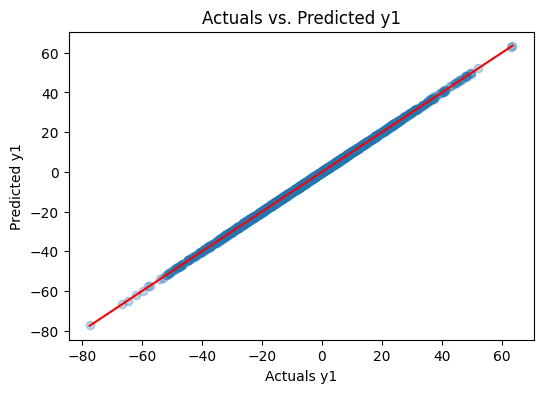

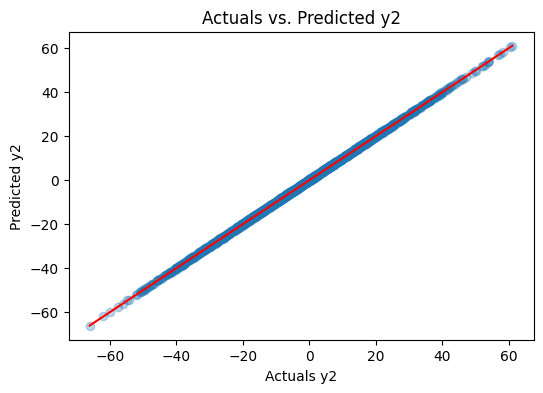

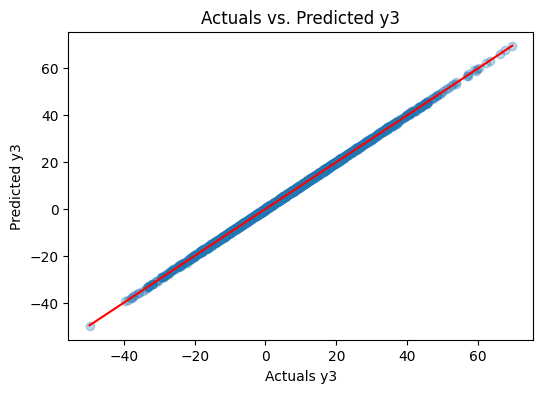

In [273]:
for i, label in enumerate(['y1', 'y2', 'y3']):
    plt.figure(figsize=(6, 4))
    plt.scatter(mlr_test_output[:, i], mlr_test_pred[:, i], alpha=0.3)
    plt.xlabel(f'Actuals {label}')
    plt.ylabel(f'Predicted {label}')
    plt.title(f'Actuals vs. Predicted {label}')
    plt.plot([min(mlr_test_output[:, i]), max(mlr_test_output[:, i])], [min(mlr_test_output[:, i]), max(mlr_test_output[:, i])], color='red')
    plt.show()

And we see from the graph that we found a better fit- regression line equation for the given points .

### 1.1.2 Generalised Regression with polynomial kernel

In [274]:
polyreg_data= data +f"poly_regression/poly_regression_data_{index_no}.txt"
with open(polyreg_data, 'r') as file:
    dim_feat, dim_ops = map(int, file.readline().strip().split())
preg_data = np.loadtxt(polyreg_data, delimiter=',', skiprows=1)

preg_features= preg_data[:, :-dim_ops]
preg_outputs= preg_data[:, -dim_ops:]
print(f"{preg_data.shape=}\n{preg_features.shape=}\n{preg_outputs.shape=}")


preg_data.shape=(10000, 5)
preg_features.shape=(10000, 2)
preg_outputs.shape=(10000, 3)


In [275]:
preg_x0 = preg_features[:,0]
preg_x1 = preg_features[:,1]
preg_features_shaped = np.column_stack((np.ones((preg_features.shape[0], 1)),preg_x0,preg_x1,preg_x0**2,preg_x1**2,preg_x0 * preg_x1))
print(f'{preg_features_shaped.shape=}')

preg_features_shaped.shape=(10000, 6)


The above feature vector $ \varphi(x) $ is in form: 
 $$
 \varphi(x) = \begin{bmatrix} 1 \\ x_0 \\ x_1 \\ x_0^2 \\ x_1^2 \\ x_0 x_1 \end{bmatrix}
 $$


Note here that we have added 1 in the first row, so we don't get a equation that passes throw origin. More over, we can say that we added 1 to keep the system consistent and find the accurate Betas.

The regression model would be in form:
$$
y = \varphi \beta + \epsilon
$$
where $ \epsilon$ is error 

Now, we need to find $\beta$ for:  
$$
\beta = (K^T K)^{-1} K^T y
$$

where $K$ is Kernal polynomial

In [276]:
preg_train_data, preg_train_output, preg_test_data, preg_test_output = split_dataset(preg_features_shaped, preg_outputs, 0.20)
print(preg_train_data.shape, preg_train_output.shape, preg_test_data.shape, preg_test_output.shape)

(8000, 6) (8000, 3) (2000, 6) (2000, 3)


In [277]:
preg_train_T_train = np.dot(preg_train_data.T, preg_train_data)
print(preg_train_T_train.shape)
preg_train_T_op = np.dot(preg_train_data.T, preg_train_output)
print(preg_train_T_op.shape)
preg_train_beta= np.linalg.solve(preg_train_T_train, preg_train_T_op)
print(preg_train_beta.shape)


(6, 6)
(6, 3)
(6, 3)


In [278]:
preg_train_beta

array([[-1.19193993, -1.48983752, -0.74945692],
       [-1.52938571, -1.4104824 , -0.50863333],
       [-0.9540371 ,  0.77465399, -2.8117135 ],
       [-0.67712013, -0.09902351, -1.41134932],
       [-1.91943596,  0.40882523, -2.75053353],
       [ 1.69950888,  0.94012019,  2.23783578]])

In [279]:
preg_test_pred = np.dot(preg_test_data, preg_train_beta)
preg_test_pred.shape


(2000, 3)

In [280]:
preg_mse = np.mean((preg_test_output - preg_test_pred) ** 2)
preg_mae = np.mean(np.abs(preg_test_output - preg_test_pred))

print(f"\nMean Squared Error: {preg_mse}\nMean Absolute Error: {preg_mae}")


Mean Squared Error: 0.16811120023245565
Mean Absolute Error: 0.3042558387698658


In [281]:
preg_train_pred= np.dot(preg_train_data, preg_train_beta) #used in Q1.1.3 for plots

#### Model Performance:

When 20% data has been split to Test and 80% data is used to train the model,  the model's evaluation using MSE and MAE are as:

- **Mean Squared Error (MSE):** 0.16397175567345346
- **Mean Absolute Error (MAE):** 0.3053008476208767

The error is very low, Which tells that the we can find Beta with the given data in polunomial form using the first two column as basis vectors, to compute the output.

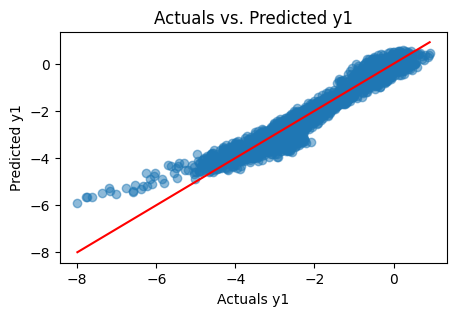

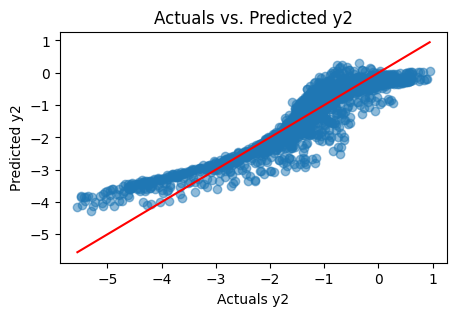

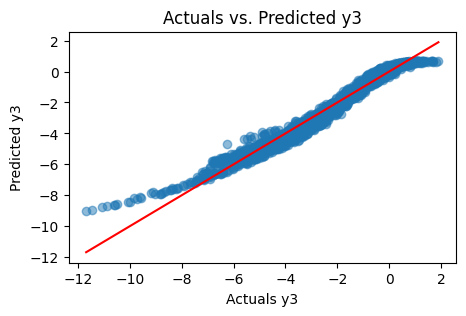

In [282]:
for i, label in enumerate(['y1', 'y2', 'y3']):
    plt.figure(figsize=(5,3))
    plt.scatter(preg_test_output[:, i], preg_test_pred[:, i], alpha=0.5)
    plt.xlabel(f'Actuals {label}')
    plt.ylabel(f'Predicted {label}')
    plt.title(f'Actuals vs. Predicted {label}')
    plt.plot([min(preg_test_output[:, i]), max(preg_test_output[:, i])], [min(preg_test_output[:, i]), max(preg_test_output[:, i])], color='red')
    plt.show()

### 1.1.3 correlation plots

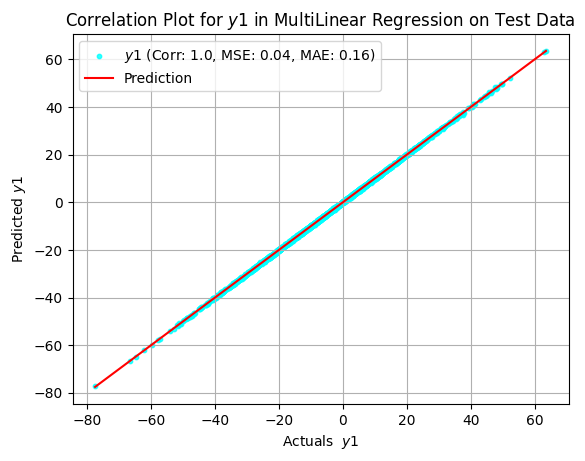

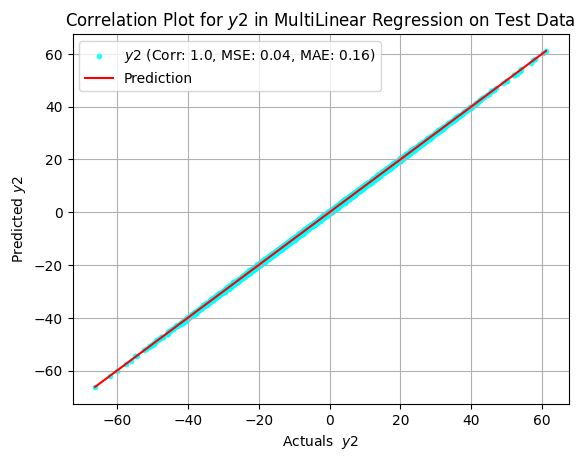

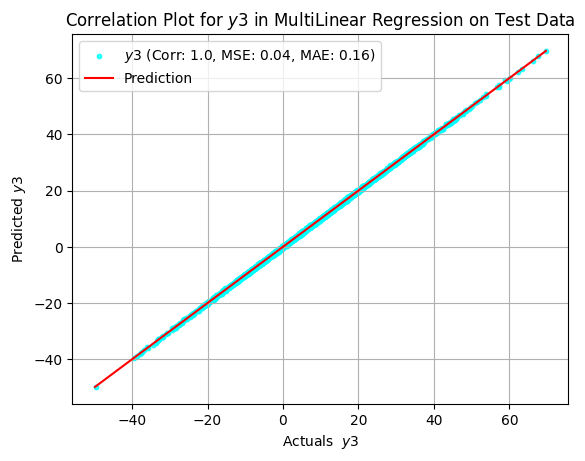

metrics in MultiLinear Regression on Test Data : 
y1 : Corr=1.0	MSE=0.04	MAE=0.16	
y2 : Corr=1.0	MSE=0.04	MAE=0.16	
y3 : Corr=1.0	MSE=0.04	MAE=0.16	


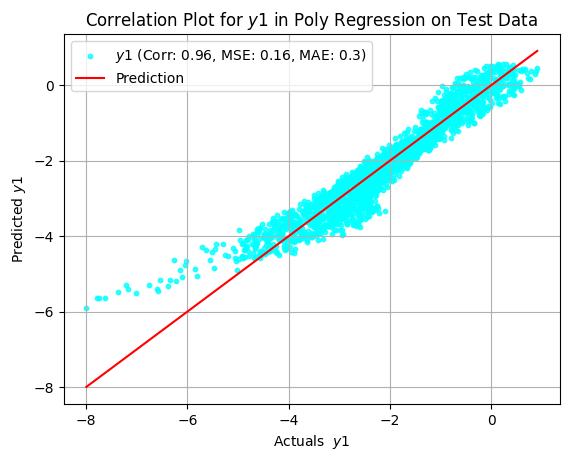

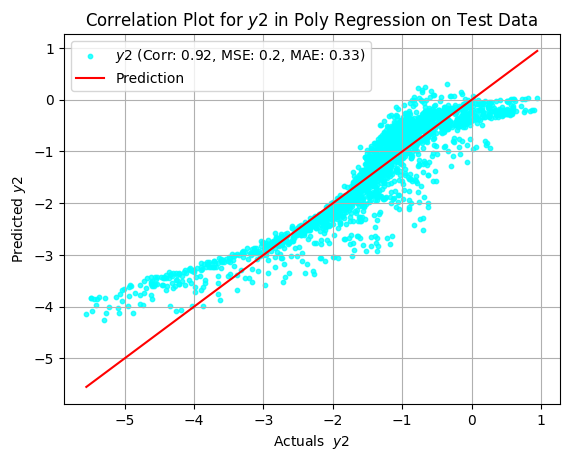

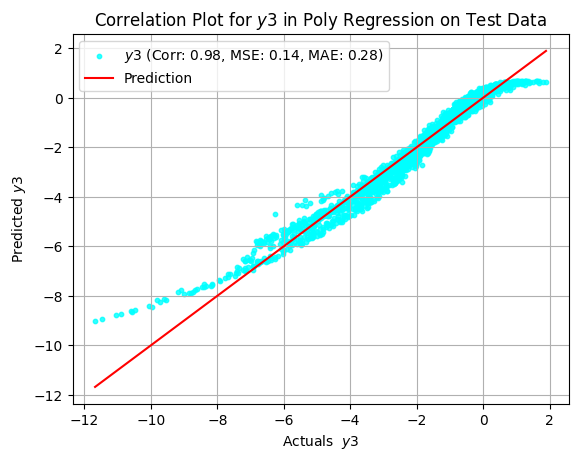

metrics in Poly Regression on Test Data : 
y1 : Corr=0.96	MSE=0.16	MAE=0.3	
y2 : Corr=0.92	MSE=0.2	MAE=0.33	
y3 : Corr=0.98	MSE=0.14	MAE=0.28	


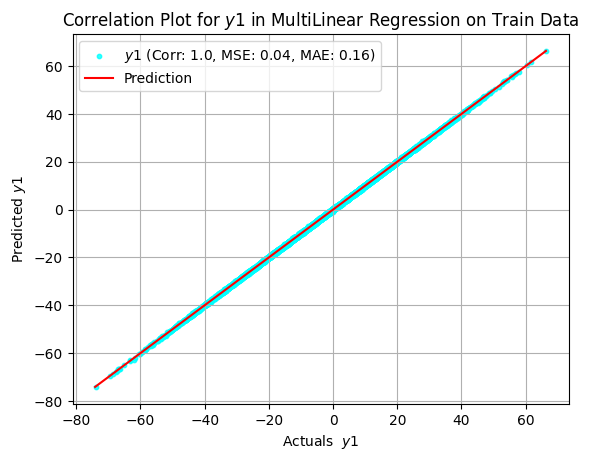

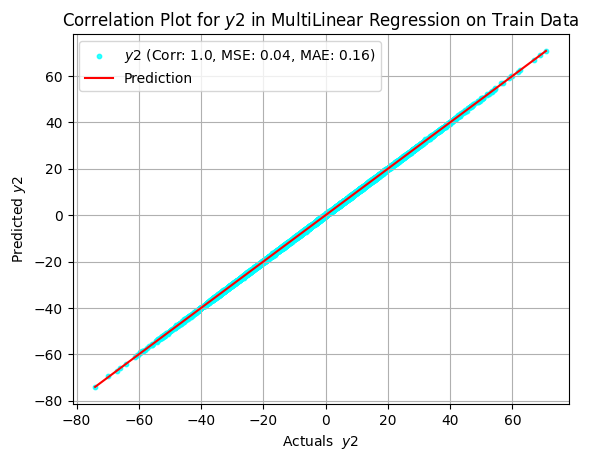

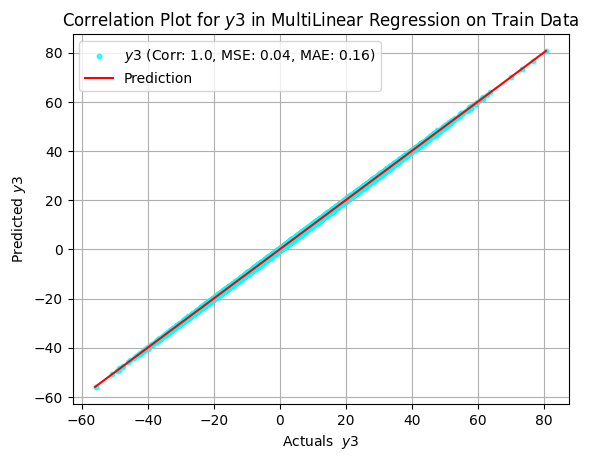

metrics in MultiLinear Regression on Train Data : 
y1 : Corr=1.0	MSE=0.04	MAE=0.16	
y2 : Corr=1.0	MSE=0.04	MAE=0.16	
y3 : Corr=1.0	MSE=0.04	MAE=0.16	


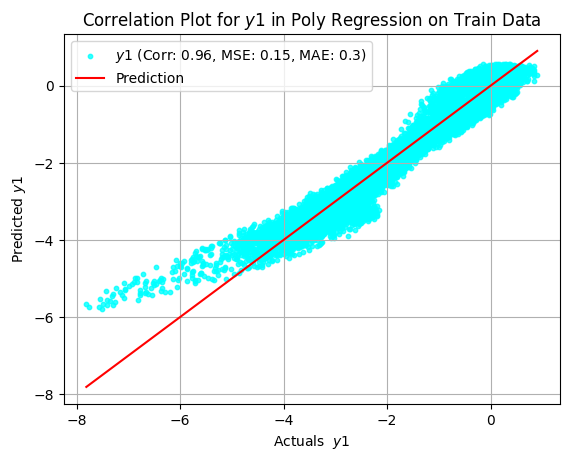

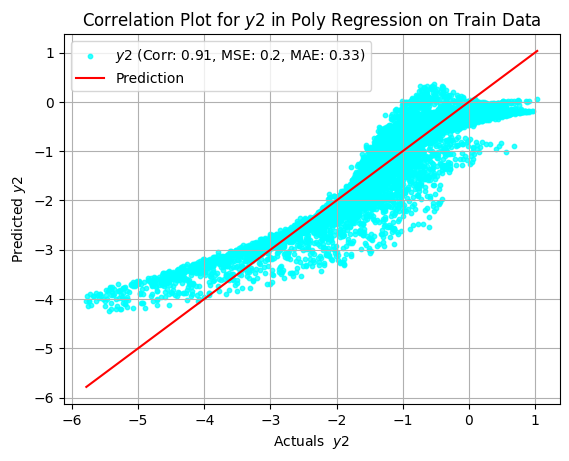

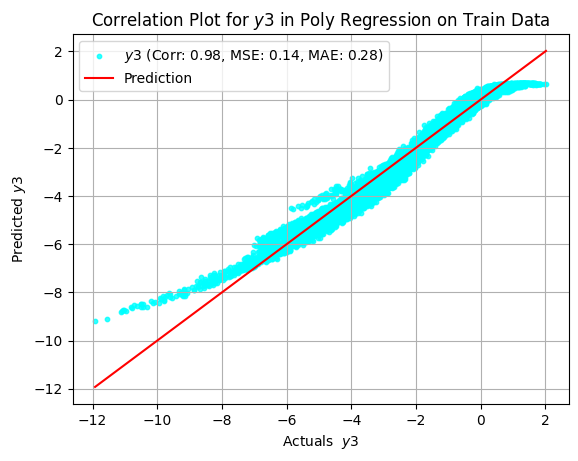

metrics in Poly Regression on Train Data : 
y1 : Corr=0.96	MSE=0.15	MAE=0.3	
y2 : Corr=0.91	MSE=0.2	MAE=0.33	
y3 : Corr=0.98	MSE=0.14	MAE=0.28	


In [283]:
def plot_correlation(targets,pred,ques):
    metrics = {}
    n = targets.shape[1]
    for i  in range(n):
        preds_i = pred[:, i]
        actuals_i = targets[:, i]
        label_i = f"$y{i+1}$"
        mse = np.mean((actuals_i - preds_i) ** 2)
        mae = np.mean(np.abs(actuals_i - preds_i))
        corr = np.corrcoef(actuals_i, preds_i)[0, 1] #pearson correlation
        metrics[label_i[1:-1]] = {'Corr':corr, 'MSE':mse,'MAE':mae}
        plt.scatter(actuals_i, preds_i, s=10 ,alpha=0.8 ,label=f'{label_i} (Corr: {round(corr,2)}, MSE: {round(mse,2)}, MAE: {round(mae,2)})',color="cyan")
        
        min_val = min(min(actuals_i), min(preds_i))
        max_val = max(max(actuals_i), max(preds_i))
        plt.plot([min_val, max_val], [min_val, max_val], label='Prediction',color = "red")
        
        plt.xlabel(f'Actuals  {label_i}')
        plt.ylabel(f'Predicted {label_i}')
        plt.title(f'Correlation Plot for {label_i} in {ques}')
        plt.legend(loc="best")
        plt.grid(True)
        plt.show()
        plt.close()
    
    print(f"metrics in {ques} : ")
    for k,v in metrics.items():
        print(k,end=' : ')
        for k2,v2 in v.items():
            print(f'{k2}={round(v2,2)}',end ='\t')
        print()
    return metrics


mlr_metrics_1 = plot_correlation(mlr_test_output,mlr_test_pred, "MultiLinear Regression on Test Data")
preg_metrics_1 = plot_correlation(preg_test_output,preg_test_pred, "Poly Regression on Test Data")
mlr_metrics_2 = plot_correlation(mlr_train_output,mlr_train_pred, "MultiLinear Regression on Train Data")
preg_metrics_2 = plot_correlation(preg_train_output,preg_train_pred, "Poly Regression on Train Data")

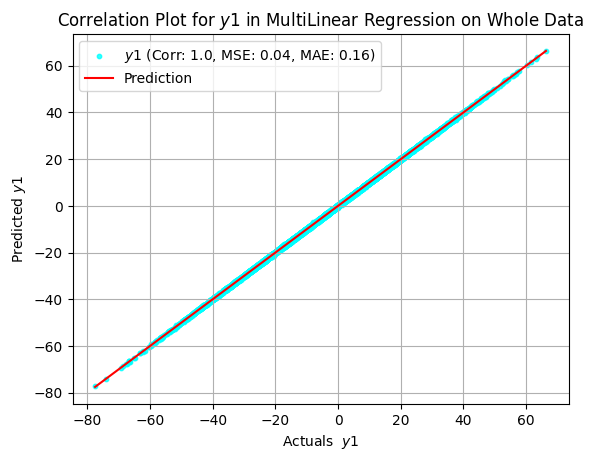

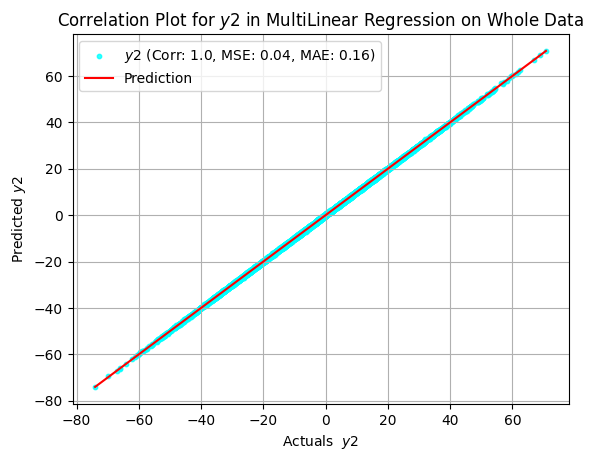

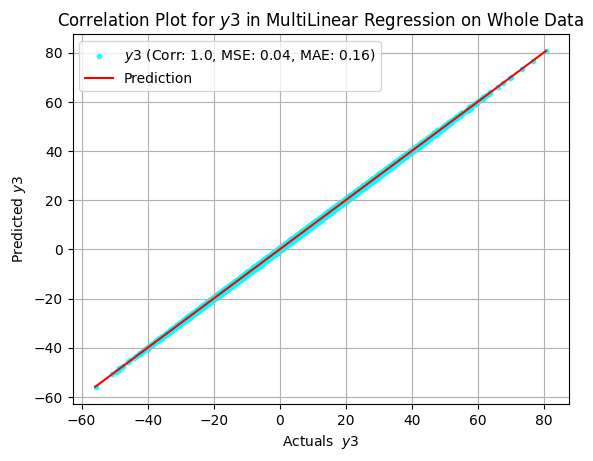

metrics in MultiLinear Regression on Whole Data : 
y1 : Corr=1.0	MSE=0.04	MAE=0.16	
y2 : Corr=1.0	MSE=0.04	MAE=0.16	
y3 : Corr=1.0	MSE=0.04	MAE=0.16	


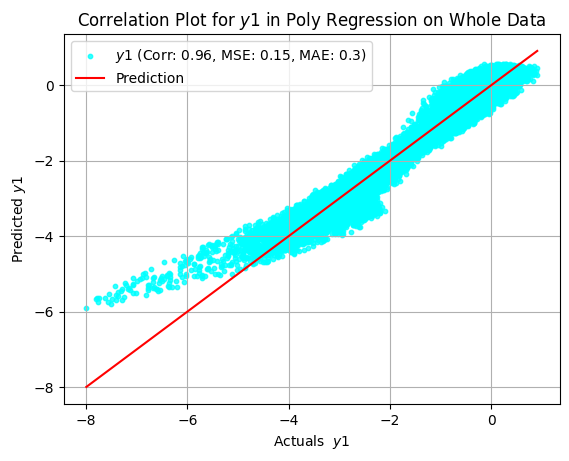

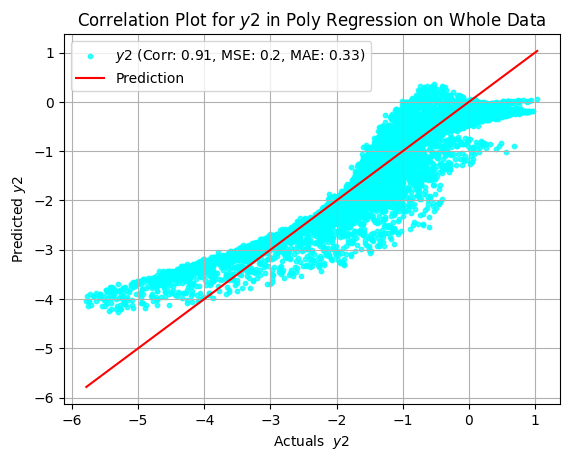

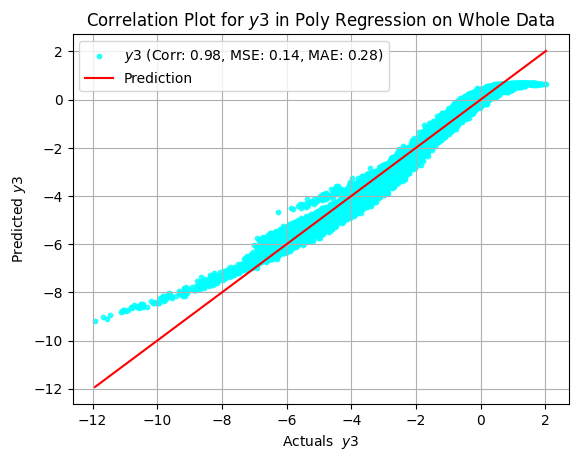

metrics in Poly Regression on Whole Data : 
y1 : Corr=0.96	MSE=0.15	MAE=0.3	
y2 : Corr=0.91	MSE=0.2	MAE=0.33	
y3 : Corr=0.98	MSE=0.14	MAE=0.28	


In [284]:
mlr_pred= np.dot(mlr_features_shaped, mlr_train_beta)
preg_pred = np.dot(preg_features_shaped, preg_train_beta)
mlr_metrics = plot_correlation(mlr_outputs,mlr_pred, "MultiLinear Regression on Whole Data")
preg_metrics = plot_correlation(preg_outputs,preg_pred, "Poly Regression on Whole Data")


Note here that I have plotted the graph based on Train Data, Test Data and whole data included.

## 1.2 (Linear) Constrained

### Constrained Linear Regression with Linear Constraints

In **Q1**, we have performed unconstrained linear regression and found the coefficient vector i.e, $ {\beta} $ that minimizes the objective function:

$$
\min_{{\beta}} \|\mathbf{A} {\beta} - \mathbf{y}\|^2
$$

where:
1. $ \mathbf{A} \in \mathbb{R}^{K \times 10} $ is the matrix of features (sensor readings),
2. $ \mathbf{y} \in \mathbb{R}^{K \times 3} $ is the matrix of target positions,
3.  $ {\beta} \in \mathbb{R}^{10 \times 3} $ is the coefficient matrix.

Now, we need to add **linear constraints** on $ {\beta} $. 

Let's say we have constraints in the form:

$$
\mathbf{P} {\beta} = \mathbf{b}
$$

where:
1. $ \mathbf{P} \in \mathbb{R}^{m \times 10} $ is the matrix defining the constraint relationships,
2. $ \mathbf{b} \in \mathbb{R}^{m \times 3} $ is the target vector for these constraints,
3. $ m $ is the number of linear constraints applied to the system.

#### Using the Method of Lagrange Multipliers:

Let Lagrange multiplier matrix $ {\lambda} \in \mathbb{R}^{m \times 3} $ and the Lagrangian:

$$
\mathcal{L}({\beta}, {\lambda}) = \|\mathbf{A} {\beta} - \mathbf{y}\|^2 + {\lambda}^T (\mathbf{P} {\beta} - \mathbf{b})
$$

Now, 
To find the optimal $ {\beta} $, let's take partial derivatives of the Lagrangian with respect to $ {\beta} $ and $ {\lambda} $ and equate them to zero and solve.

1. **Partial derivative with respect to $ {\beta} $:**

   $$
   \frac{\partial \mathcal{L}}{\partial {\beta}} = 2 \mathbf{A}^T (\mathbf{A} {\beta} - \mathbf{y}) + \mathbf{P}^T {\lambda} = 0
   $$

2. **Partial derivative with respect to $ {\lambda} $:**

   $$
   \frac{\partial \mathcal{L}}{\partial {\lambda}} = \mathbf{P} {\beta} - \mathbf{b} = 0
   $$

By solving these system of linear equations:

$$
\begin{bmatrix} 
2 \mathbf{A}^T \mathbf{A} & \mathbf{P}^T \\ 
\mathbf{P} & \mathbf{0} 
\end{bmatrix}
\begin{bmatrix} 
{\beta}^* \\ 
{\lambda} 
\end{bmatrix} = 
\begin{bmatrix} 
2 \mathbf{A}^T \mathbf{y} \\ 
\mathbf{b} 
\end{bmatrix}
$$

So, we get the optimal value i.e,  $ {\beta}^* $ by solving this system of equations.


Now,let us assume we have:

$$
A^{'}= 
\begin{bmatrix} 
2 \mathbf{A}^T \mathbf{A} & \mathbf{P}^T \\ 
\mathbf{P} & \mathbf{0} 
\end{bmatrix}
$$

$$
\beta^{'} =
\begin{bmatrix} 
{\beta}^* \\ 
{\lambda} 
\end{bmatrix}
$$

$$
b^{'} = 
\begin{bmatrix} 
2 \mathbf{A}^T \mathbf{y} \\ 
\mathbf{b} 
\end{bmatrix}
$$

Hence, we can now solve $A'\beta' = b'$ by applying linear regression on $A'$ and $b'$ and hence,  finding $\beta'^{*}$

#### Loading the Constraints A, b

In [285]:
constrain_file = data+ f"constraints/constraints_{index_no}.txt"
with open(constrain_file, 'r') as file:
    A_rows, A_cols, b_dim = map(int, file.readline().strip().split())

A = np.loadtxt(constrain_file, delimiter=',', skiprows=1, max_rows=A_rows)
b = np.loadtxt(constrain_file, delimiter=',', skiprows=1 + A_rows)
A_shaped = np.hstack((np.zeros((A.shape[0], 1)), A))
print(A_shaped.shape, b.shape)


(3, 11) (3,)


In [286]:
A_t_1 = np.hstack([2 * mlr_train_T_train, A_shaped.T]) #using train data 
A_t_2 = np.hstack([A_shaped, np.zeros((A_shaped.shape[0], A_shaped.shape[0]))]) 
print(A_t_1.shape, A_t_2.shape)
A_updated= np.vstack([A_t_1, A_t_2])
print(A_updated.shape)

(11, 14) (3, 14)
(14, 14)


Note here that 1 extra column has added, it is because of the ones row we added in 1.1.1

In [287]:
b_reshaped = b.reshape((1,3))
b_sq = np.tile(b_reshaped, (3, 1))
print(mlr_train_T_op.shape, b_sq.shape)
b_updated= np.vstack([2 * mlr_train_T_op, b_sq]) #using train data
print(b_updated.shape) 

(11, 3) (3, 3)
(14, 3)


In [288]:
b

array([ 47.831313,  53.179336, 154.903036])

In [289]:
A_train_beta= np.linalg.solve(A_updated, b_updated)
print(A_train_beta.shape)
print(A_train_beta)

(14, 3)
[[-3.84227393e+00 -2.27099839e+00  8.21287061e+00]
 [-4.69525975e+00 -2.59588212e+00  2.46109353e+00]
 [-5.38730991e-02 -5.66020837e+00  3.81314216e+00]
 [-3.71067501e+00 -4.42310469e+00 -2.76937344e+00]
 [ 1.19568371e+01 -2.15358710e+00  3.80786839e+00]
 [ 3.51326642e+00 -1.76007084e+00 -4.38231902e+00]
 [-5.63076334e+00 -9.84771234e+00 -9.57865331e+00]
 [-6.89067661e+00  7.36576100e+00 -1.04267119e+01]
 [-4.14911384e+00 -2.01659948e-02 -1.31141357e+00]
 [-2.53577630e+00  4.70245520e+00  3.00912124e+00]
 [ 2.99636932e+00 -6.96526394e+00 -3.68981975e+00]
 [-2.17729780e+04 -1.74961566e+04 -8.06962539e+03]
 [ 1.40075336e+01  3.60715232e+03 -1.51163562e+04]
 [ 2.45625198e+03  5.87262499e+03 -2.61850749e+03]]


In [290]:
beta = A_train_beta[:mlr_features_shaped.shape[1], :]     
lagrange_lambda = A_train_beta[mlr_features_shaped.shape[1]:, :]  
print(beta.shape, lagrange_lambda.shape)
print("Beta:")
print(beta)
print("Lambda:")
print(lagrange_lambda)

(11, 3) (3, 3)
Beta:
[[ -3.84227393  -2.27099839   8.21287061]
 [ -4.69525975  -2.59588212   2.46109353]
 [ -0.0538731   -5.66020837   3.81314216]
 [ -3.71067501  -4.42310469  -2.76937344]
 [ 11.95683714  -2.1535871    3.80786839]
 [  3.51326642  -1.76007084  -4.38231902]
 [ -5.63076334  -9.84771234  -9.57865331]
 [ -6.89067661   7.365761   -10.42671189]
 [ -4.14911384  -0.02016599  -1.31141357]
 [ -2.5357763    4.7024552    3.00912124]
 [  2.99636932  -6.96526394  -3.68981975]]
Lambda:
[[-2.17729780e+04 -1.74961566e+04 -8.06962539e+03]
 [ 1.40075336e+01  3.60715232e+03 -1.51163562e+04]
 [ 2.45625198e+03  5.87262499e+03 -2.61850749e+03]]


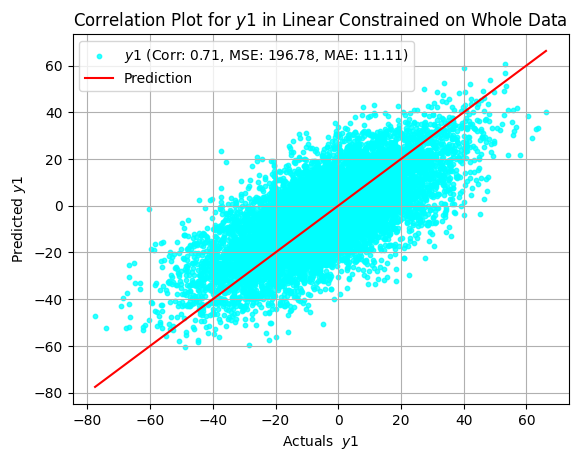

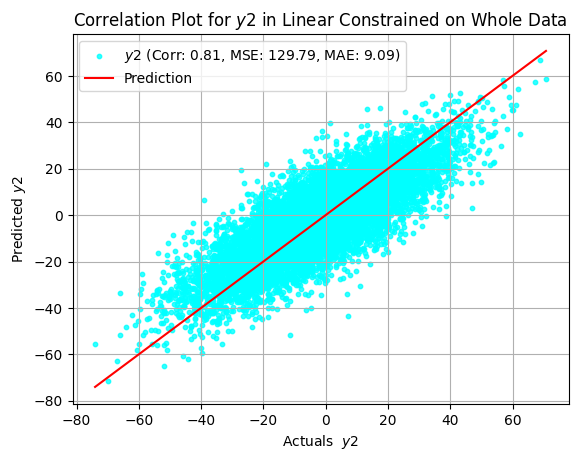

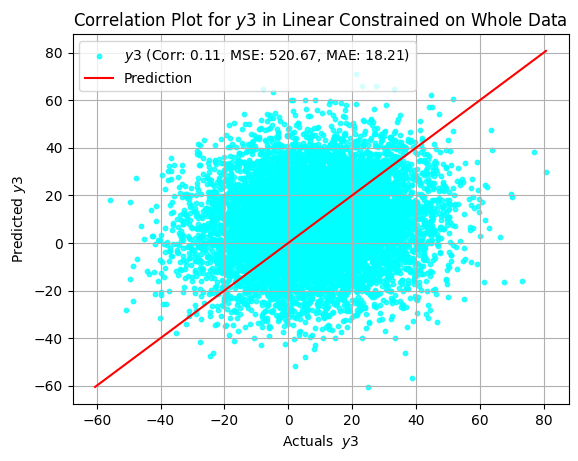

metrics in Linear Constrained on Whole Data : 
y1 : Corr=0.71	MSE=196.78	MAE=11.11	
y2 : Corr=0.81	MSE=129.79	MAE=9.09	
y3 : Corr=0.11	MSE=520.67	MAE=18.21	


In [291]:
y_pred = np.dot(mlr_features_shaped, beta)
constraned_metrics = plot_correlation(mlr_outputs,y_pred, "Linear Constrained on Whole Data")

#  2 Principle Component Analysis

## 2.1 PCA Implementation

In [292]:
#downloaded the file using the given link
data= "./DATA PA/"
mnist_data_folder = data + f"MNIST_CSV/"
mnist_train_data =  mnist_data_folder + f'train-images.idx3-ubyte'
mnist_train_output =  mnist_data_folder + f'train-labels.idx1-ubyte'
mnist_test_data =  mnist_data_folder + f't10k-images.idx3-ubyte'
mnist_test_output =  mnist_data_folder + f't10k-labels.idx1-ubyte'


In [293]:
import struct 
def idx_file_read(fn):
    with open(fn, 'rb') as f:
        _, _, dims = struct.unpack('>HBB', f.read(4))
        shape = tuple(struct.unpack('>I', f.read(4))[0] for d in range(dims))
        return np.frombuffer(f.read(), dtype=np.uint8).reshape(shape)
    

mnist_train_data = idx_file_read(mnist_train_data)
mnist_train_output= idx_file_read(mnist_train_output)
mnist_test_data = idx_file_read(mnist_test_data)
mnist_test_output = idx_file_read(mnist_test_output)

mnist_train_data.shape,mnist_train_output.shape,mnist_test_data.shape ,mnist_test_output.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [294]:
mnist_train_flat_data = mnist_train_data.reshape(-1, 28 * 28)
mnist_test_flat_data = mnist_test_data.reshape(-1, 28 * 28)

In [295]:
n_components = 100

In [296]:
def standardize_data(X):
    mean_col = np.mean(X, axis=0) #column wise mean
    std_col = np.std(X, axis=0) #column wise std
    std_2= std_col.copy()
    std_col[std_col==0] = 1.0 #to avoid division by zero
    return X - mean_col / std_col , mean_col , std_2

In [297]:
def compute_pca_eigen(X, n_components):
	covariance_matrix = np.cov(X, rowvar=False) #rowvar=False means that the columns are variables
	e_values, e_vectors = np.linalg.eigh(covariance_matrix)
	flag = np.argsort(-e_values)
	e_vectors = e_vectors[:, flag]
	e_values = e_values[flag]
	pc = e_vectors[:, :n_components]
	variance = e_values[:n_components] 
	return pc , variance

In [298]:
mnist_train_standard, mnist_meanTrain,  mnist_stdTrain  = standardize_data(mnist_train_flat_data)
mnist_test_standard ,mnist_meanTest,  mnist_stdTest = standardize_data(mnist_test_flat_data)
mnist_pc, mnist_var = compute_pca_eigen(mnist_train_standard, n_components)
print(mnist_var)

[332724.66744657 243283.9390705  211507.36705827 184776.38586219
 166926.83131066 147844.96167532 112178.20271178  98874.42962709
  94696.24905304  80809.82453195  72313.62025957  69358.30132665
  58826.87114946  58014.08401671  54123.75694878  50843.06852706
  45412.60630628  43778.45913157  40705.3404534   39519.79037989
  36553.53586136  34515.1938788   32693.28606333  31286.58581655
  30287.55259946  28776.07835035  27859.28540477  26960.58144171
  25533.19358799  23686.12297985  22562.76193847  22221.76640968
  20660.67182486  20110.98541392  19543.20092442  18638.29211807
  17340.90030818  16726.24478585  16505.8173745   16191.66315681
  15659.57994266  15251.21411619  14348.32884525  13652.8231403
  13198.86432525  12860.42927988  12411.48280031  12054.31597879
  11658.90431823  11035.47439069  10937.50779546  10724.52539262
  10147.77338838   9906.81588767   9741.41801432   9306.18378419
   9240.54996976   8861.73787802   8700.53134174   8392.32150248
   8245.75894554   8203.13

In [299]:
def reconstruct_images(X, components, mean):
	return ((X - mean) @ components) @ components.T + mean
mnist_train_new = reconstruct_images(mnist_train_standard, mnist_pc, mnist_meanTrain)
mnist_test_new = reconstruct_images(mnist_test_standard, mnist_pc,mnist_meanTest)

In [300]:
var_ratio = mnist_var / np.sum(mnist_var)
'max:', max( (j, i) for i,j in enumerate(var_ratio) ) , "min:", min( (j, i) for i, j in enumerate(var_ratio) )

('max:', (0.1061049769506929, 0), 'min:', (0.0010991046993752607, 99))

In [301]:
def plot_sample_compare(images_flat,reconstructed,n_components = None , Test_or_Train = None ,shape = (28,28)):
	img = np.random.choice(images_flat.shape[0]) #randomly select an image
	fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(5, 3))
	ax[0].imshow(images_flat[img].reshape(shape))
	ax[0].set_title('Given Data')
	ax[1].imshow(reconstructed[img].reshape(shape))
	ax[1].set_title('Algorithm Constructed')
	plt.axis('off')
	if n_components:
		fig.suptitle( str(Test_or_Train) + ' N_components = ' + str(n_components))

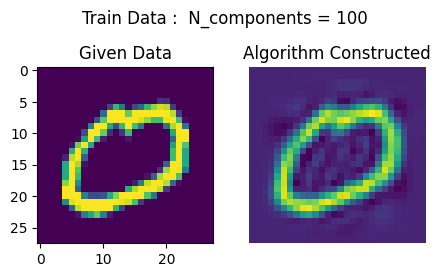

In [302]:
plot_sample_compare(mnist_train_flat_data, mnist_train_new,n_components, 'Train Data : ')

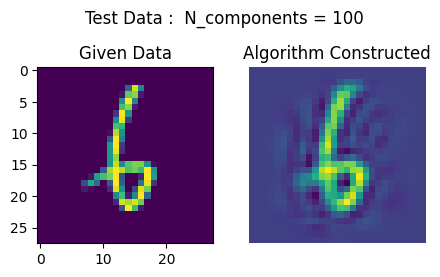

In [303]:
plot_sample_compare(mnist_test_flat_data, mnist_test_new ,n_components ,'Test Data : ')

## PCA on CIFAR Data

In [304]:
cifar_train_batch_1_file = data + 'cifar-10-batches-py/data_batch_1'
cifar_train_batch_2_file = data + 'cifar-10-batches-py/data_batch_2'
cifar_train_batch_3_file = data + 'cifar-10-batches-py/data_batch_3'
cifar_train_batch_4_file = data + 'cifar-10-batches-py/data_batch_4'
cifar_train_batch_5_file = data + 'cifar-10-batches-py/data_batch_5'
cifar_test_file = data + 'cifar-10-batches-py/test_batch' 

In [305]:
def unpickle(fn):
    import pickle
    with open(fn, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

file_list=[cifar_train_batch_1_file,cifar_train_batch_2_file,cifar_train_batch_3_file,cifar_train_batch_4_file,cifar_train_batch_5_file,cifar_test_file]
cifar_batch={}
for i in range(len(file_list)):
    cifar_batch[i]= unpickle(file_list[i])
    print(cifar_batch[i].keys())
    
cifar_batch_test = unpickle(cifar_test_file)

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])
dict_keys([b'batch_label', b'labels', b'data', b'filenames'])
dict_keys([b'batch_label', b'labels', b'data', b'filenames'])
dict_keys([b'batch_label', b'labels', b'data', b'filenames'])
dict_keys([b'batch_label', b'labels', b'data', b'filenames'])
dict_keys([b'batch_label', b'labels', b'data', b'filenames'])


In [306]:
cifar_batch_data={}
cifar_batch_labels=dict()
for i in range(5):
    cifar_batch_data[i]= cifar_batch[i][b'data']
    print(cifar_batch_data[i].shape)
    cifar_batch_labels[i] = np.array(cifar_batch[i][b'labels'])
    print(cifar_batch_labels[i].shape)

(10000, 3072)
(10000,)
(10000, 3072)
(10000,)
(10000, 3072)
(10000,)
(10000, 3072)
(10000,)
(10000, 3072)
(10000,)


In [307]:
cifar_data_tt = cifar_batch_test[b'data']
cifar_tt_op = np.array(cifar_batch_test[b'labels'])
print(cifar_data_tt.shape)
print(cifar_tt_op.shape)

(10000, 3072)
(10000,)


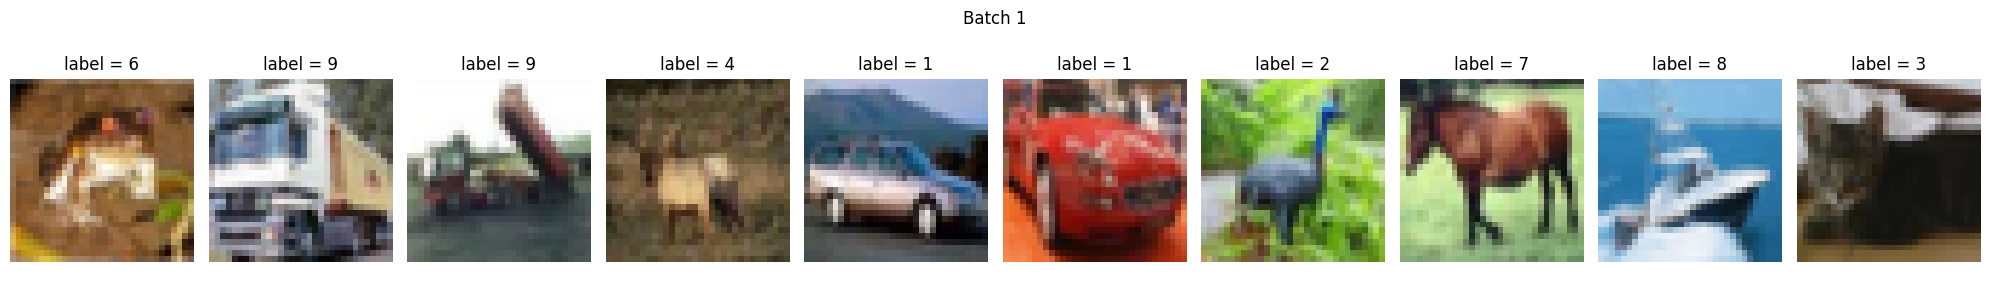

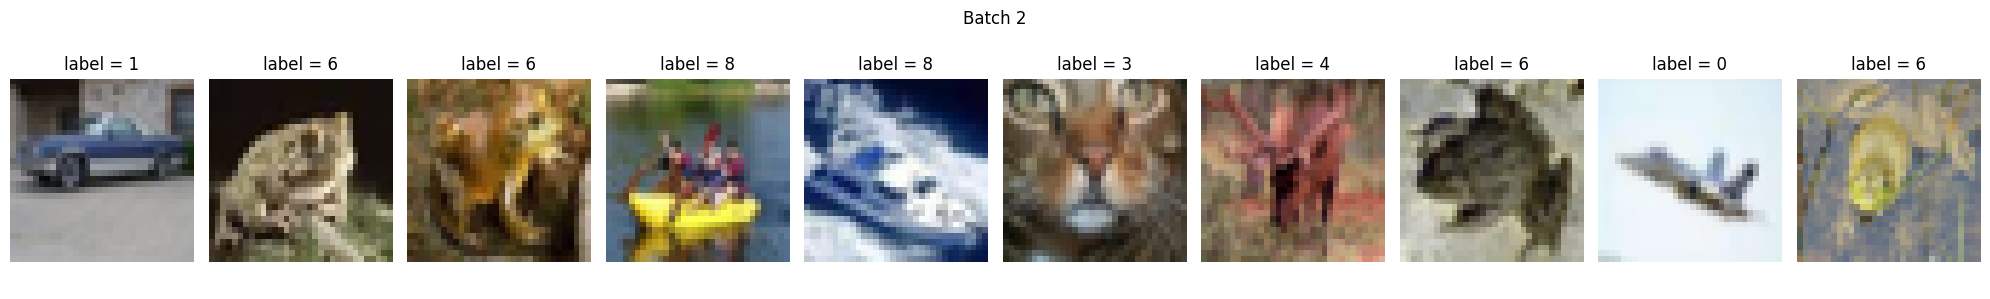

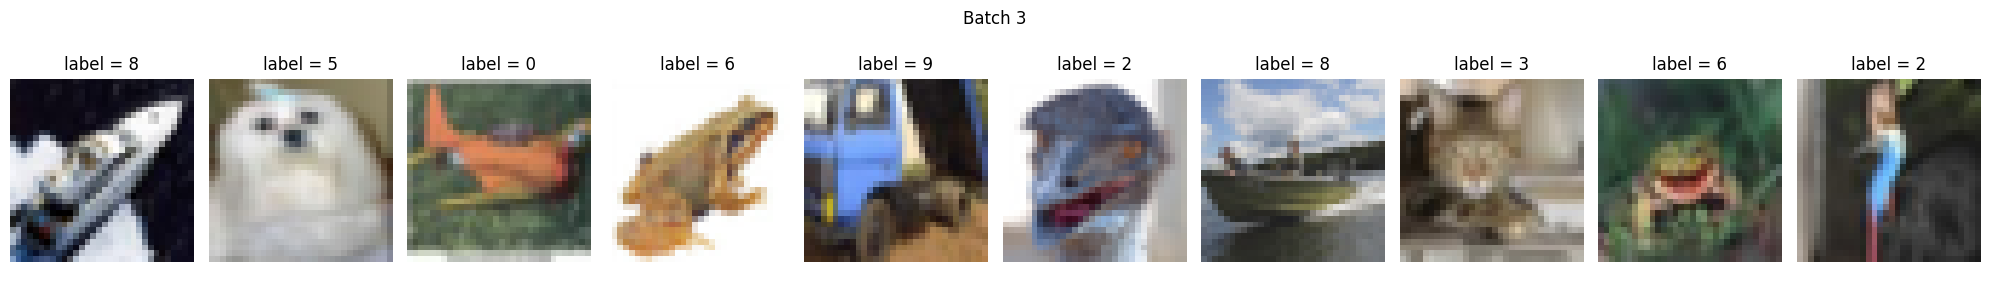

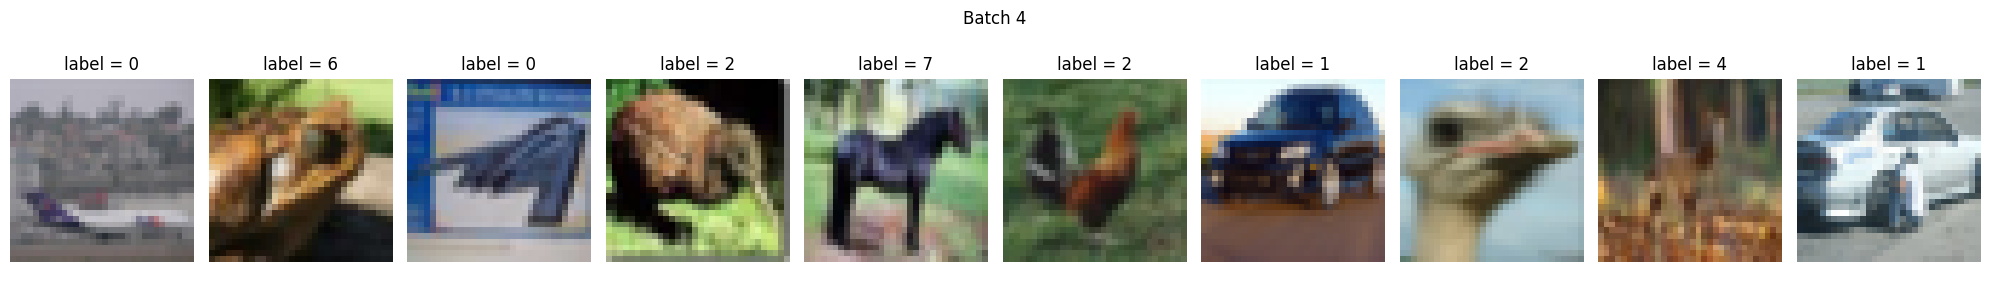

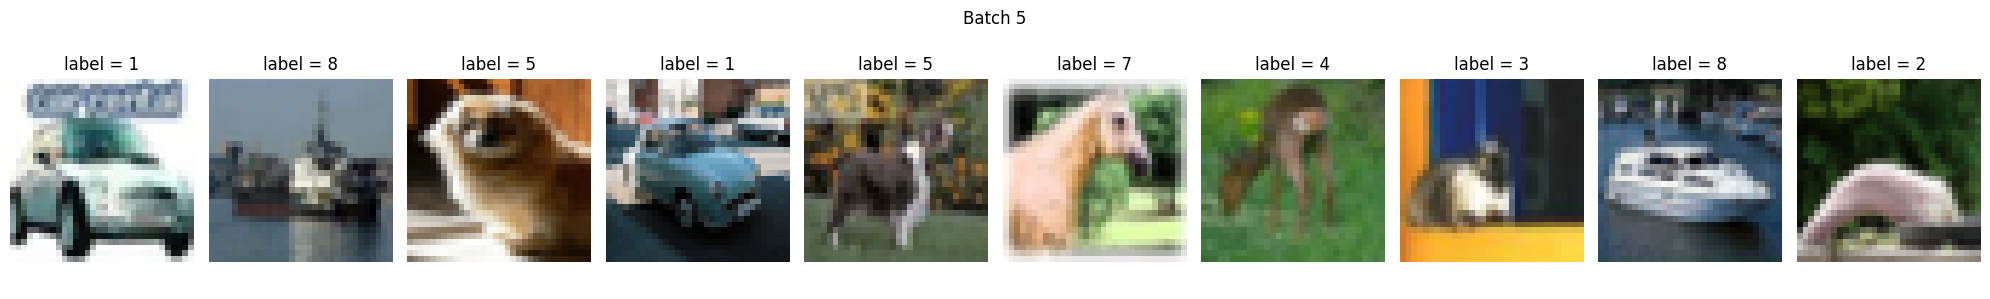

In [308]:
for k in range(5):
	# print(f'{batch} :')
	fig, ax = plt.subplots(figsize = (20,3))
	plt.axis('off')
	for i in range(1, 11):
		plt.subplot(1, 10, i)
		plt.axis('off')
		plt.title(f'label = {cifar_batch_labels[k][i-1]}')
		plt.imshow(cifar_batch_data[k][i-1].reshape(3, 32, 32).transpose(1,2, 0), cmap='gray')
	fig.suptitle(f'Batch {k+1}')
	plt.tight_layout()

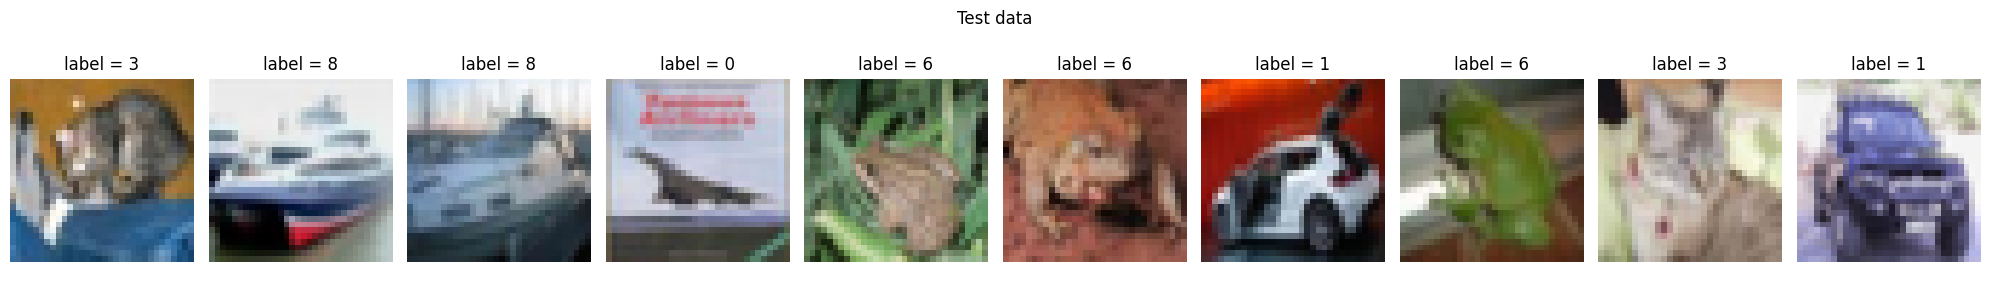

In [309]:
fig, ax = plt.subplots(figsize = (20,3))
plt.axis('off')
for i in range(1, 11):
    plt.subplot(1, 10, i)
    plt.axis('off')
    plt.title(f'label = {cifar_tt_op[i-1]}')
    plt.imshow(cifar_data_tt[i-1].reshape(3, 32, 32).transpose(1,2, 0), cmap='gray')
fig.suptitle(f'Test data')
plt.tight_layout()

In [310]:
cifar_data_tr= np.vstack([cifar_batch_data[i] for i in range(5)])
cifar_tr_op= np.hstack([cifar_batch_labels[i] for i in range(5)])
cifar_data_tt = cifar_data_tt.reshape(-1,32*32*3)
cifar_data_tr.shape , cifar_tr_op.shape ,cifar_data_tt.shape,cifar_tt_op.shape

((50000, 3072), (50000,), (10000, 3072), (10000,))

In [311]:
cifar_train_Red = cifar_data_tr[: , 0*32*32:1*32*32]
cifar_train_Green = cifar_data_tr[: , 1*32*32:2*32*32]
cifar_train_Blue = cifar_data_tr[: , 2*32*32:3*32*32]
cifar_test_Red = cifar_data_tt[: , 0*32*32:1*32*32]
cifar_test_Green = cifar_data_tt[: , 1*32*32:2*32*32]
cifar_test_Blue = cifar_data_tt[: , 2*32*32:3*32*32]

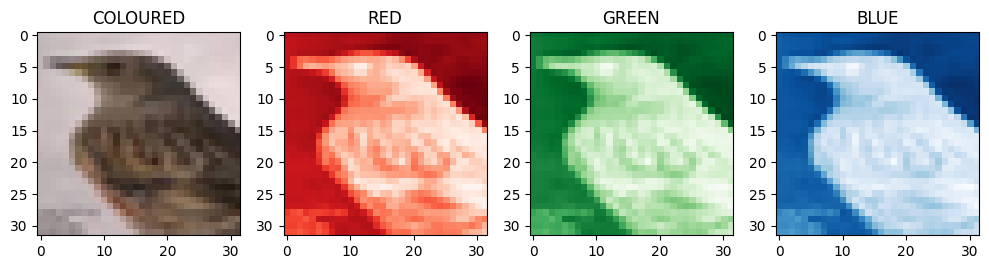

In [312]:
img = 18 #randomly selected image
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
axes[0].imshow(cifar_data_tr[img].reshape(3, 32, 32).transpose(1,2, 0))
axes[0].set_title('COLOURED')
axes[1].imshow(cifar_train_Red[img].reshape(32, 32) ,cmap = 'Reds' )
axes[1].set_title('RED')
axes[2].imshow(cifar_train_Green[img].reshape(32, 32) ,cmap = 'Greens' )
axes[2].set_title('GREEN')
axes[3].imshow(cifar_train_Blue[img].reshape(32, 32) ,cmap = 'Blues' )
axes[3].set_title('BLUE') 
plt.tight_layout()

In [313]:
n_components = 250

RED data

In [314]:

cifar_R_train_standard, cifar_R_meanTrain,  cifar_R_stdTrain  = standardize_data(cifar_train_Red)
cifar_R_test_standard ,cifar_R_meanTest,  cifar_R_stdTest = standardize_data(cifar_test_Red)
cifar_R_pc, cifar_R_var = compute_pca_eigen(cifar_R_train_standard, n_components)

cifar_R_recons_train = reconstruct_images(cifar_R_train_standard, cifar_R_pc, cifar_R_meanTrain)
cifar_R_recons_test = reconstruct_images(cifar_R_test_standard, cifar_R_pc,cifar_R_meanTest)

GREEN data

In [315]:
cifar_G_train_standard, cifar_G_meanTrain, cifar_G_stdTrain = standardize_data(cifar_train_Green)
cifar_G_test_standard, cifar_G_meanTest, cifar_G_stdTest = standardize_data(cifar_test_Green)
cifar_G_pc, cifar_G_var = compute_pca_eigen(cifar_G_train_standard, n_components)

cifar_G_recons_train= reconstruct_images(cifar_G_train_standard, cifar_G_pc, cifar_G_meanTrain)
cifar_G_recons_test= reconstruct_images(cifar_G_test_standard, cifar_G_pc, cifar_G_meanTest)


BLUE data

In [316]:
cifar_B_train_standard, cifar_B_meanTrain, cifar_B_stdTrain = standardize_data(cifar_train_Blue)
cifar_B_test_standard, cifar_B_meanTest, cifar_B_stdTest = standardize_data(cifar_test_Blue)
cifar_B_pc, cifar_B_var = compute_pca_eigen(cifar_B_train_standard, n_components)

cifar_B_recons_train = reconstruct_images(cifar_B_train_standard, cifar_B_pc, cifar_B_meanTrain)
cifar_B_recons_test= reconstruct_images(cifar_B_test_standard, cifar_B_pc, cifar_B_meanTest)


RGB channels

In [317]:
cifar_train_new = np.hstack((cifar_R_recons_train.astype('uint8'),cifar_G_recons_train.astype('uint8'),cifar_B_recons_train.astype('uint8')))
cifar_test_new = np.hstack((cifar_R_recons_test.astype('uint8'),cifar_G_recons_test.astype('uint8'),cifar_B_recons_test.astype('uint8')))

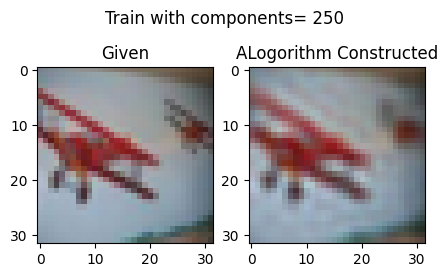

In [318]:
def plot_compare_colour(images_flat, new_data, n_components = None , ty = None):
	img = np.random.choice(images_flat.shape[0]) #randomly select an image
	fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 3))
	axes[0].imshow(images_flat[img].reshape(3, 32, 32).transpose(1,2, 0))
	axes[0].set_title('Given')
	axes[1].imshow(new_data[img].reshape(3, 32, 32).transpose(1,2, 0))
	axes[1].set_title('ALogorithm Constructed')
	if n_components:
		fig.suptitle( str(ty) + ' with components= ' + str(n_components))

plot_compare_colour(cifar_data_tr, cifar_train_new , n_components ,"Train")

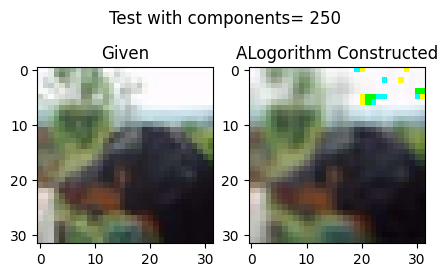

In [319]:
plot_compare_colour(cifar_data_tt, cifar_test_new , n_components ,"Test")


Text(0.5, 1.0, 'BLUE')

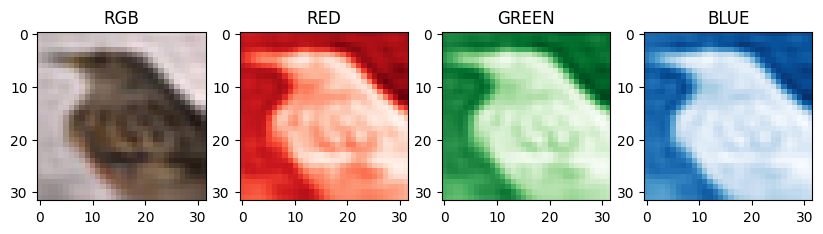

In [320]:
img = 18 #randomly selected image
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
cifar_train_new= np.hstack((cifar_R_recons_train, cifar_G_recons_train, cifar_B_recons_train))
axes[0].imshow(cifar_train_new[img].astype('uint8').reshape(3, 32, 32).transpose(1,2, 0))
axes[0].set_title('RGB') 
axes[1].imshow(cifar_R_recons_train[img].reshape(32, 32) ,cmap = 'Reds' )
axes[1].set_title('RED')
axes[2].imshow(cifar_G_recons_train[img].reshape(32, 32) ,cmap = 'Greens' )
axes[2].set_title('GREEN')
axes[3].imshow(cifar_B_recons_train[img].reshape(32, 32) ,cmap = 'Blues' )
axes[3].set_title('BLUE') 


## 2.2 Analysis and Visualization

In [321]:
def mae(org, pred):
    return np.mean(np.abs((org - pred)))

def mse(org, pred):
    return np.mean((org - pred) ** 2)

def psnr(org, pred):
    mse_val = mse(org, pred)
    if mse_val == 0:
        return 100 , mse_val
    max_f = 255
    psnr_val = 20 * np.log10(max_f / np.sqrt(mse_val))
    return psnr_val , mse_val

def compression_ratio(org, n_components):
    each_pixel=org.shape[1]
    total_size= each_pixel * org.shape[0]
    compressed_size_per_image=n_components
    compressed_total_size= compressed_size_per_image * org.shape[0]
    return total_size/compressed_total_size

def calculate_metrics(org, pred,n_components):
    mae_val = mae(org, pred)
    psnr_val, mse_val = psnr(org, pred)
    c_ratio= compression_ratio(org,n_components)
    return {'MSE' : mse_val ,'MAE' : mae_val, 'PSNR' : psnr_val, 'Compression Ratio' : c_ratio}
    

### 2.2.2.1

In [322]:
various_n_components=[150,250,350,450,550]
compression_ratios_list=[]
psnr_list=[]
for i in various_n_components:
    cifar_R_pc, cifar_R_var = compute_pca_eigen(cifar_R_train_standard, i)
    cifar_G_pc, cifar_G_var = compute_pca_eigen(cifar_G_train_standard, i)
    cifar_B_pc, cifar_B_var = compute_pca_eigen(cifar_B_train_standard, i)
    cifar_R_recons_train = reconstruct_images(cifar_R_train_standard, cifar_R_pc, cifar_R_meanTrain)
    cifar_R_recons_test = reconstruct_images(cifar_R_test_standard, cifar_R_pc,cifar_R_meanTest)
    cifar_G_recons_train= reconstruct_images(cifar_G_train_standard, cifar_G_pc, cifar_G_meanTrain)
    cifar_G_recons_test= reconstruct_images(cifar_G_test_standard, cifar_G_pc, cifar_G_meanTest)
    cifar_B_recons_train = reconstruct_images(cifar_B_train_standard, cifar_B_pc, cifar_B_meanTrain)
    cifar_B_recons_test= reconstruct_images(cifar_B_test_standard, cifar_B_pc, cifar_B_meanTest)
    cifar_train_new = np.hstack((cifar_R_recons_train.astype('uint8'),cifar_G_recons_train.astype('uint8'),cifar_B_recons_train.astype('uint8')))
    cifar_test_new = np.hstack((cifar_R_recons_test.astype('uint8'),cifar_G_recons_test.astype('uint8'),cifar_B_recons_test.astype('uint8')))
    cifar_train_metrics = calculate_metrics(cifar_data_tr, cifar_train_new,i)
    cifar_test_metrics = calculate_metrics(cifar_data_tt, cifar_test_new,i)
    compression_ratios_list.append(cifar_train_metrics['Compression Ratio'])
    psnr_list.append(cifar_train_metrics['PSNR'])
    print(f'For {i} components :')
    print(f'Train Data : {cifar_train_metrics}')
    print(f'Test Data : {cifar_test_metrics}')
    print()
    

For 150 components :
Train Data : {'MSE': 62.945297233072914, 'MAE': 98.46335202473958, 'PSNR': 30.14117072206706, 'Compression Ratio': 20.48}
Test Data : {'MSE': 63.13620237630208, 'MAE': 98.46401285807292, 'PSNR': 30.128019052093585, 'Compression Ratio': 20.48}

For 250 components :
Train Data : {'MSE': 50.56717330729167, 'MAE': 87.9721680859375, 'PSNR': 31.09211683512929, 'Compression Ratio': 12.288}
Test Data : {'MSE': 50.90553502604167, 'MAE': 88.03947825520834, 'PSNR': 31.0631535455126, 'Compression Ratio': 12.288}

For 350 components :
Train Data : {'MSE': 39.79787724609375, 'MAE': 76.98958681640624, 'PSNR': 32.13220452736278, 'Compression Ratio': 8.777142857142858}
Test Data : {'MSE': 40.23957333984375, 'MAE': 77.19714475911458, 'PSNR': 32.08426993619588, 'Compression Ratio': 8.777142857142858}

For 450 components :
Train Data : {'MSE': 30.389143359375, 'MAE': 65.111927109375, 'PSNR': 33.303619029577604, 'Compression Ratio': 6.826666666666667}
Test Data : {'MSE': 30.86546363932

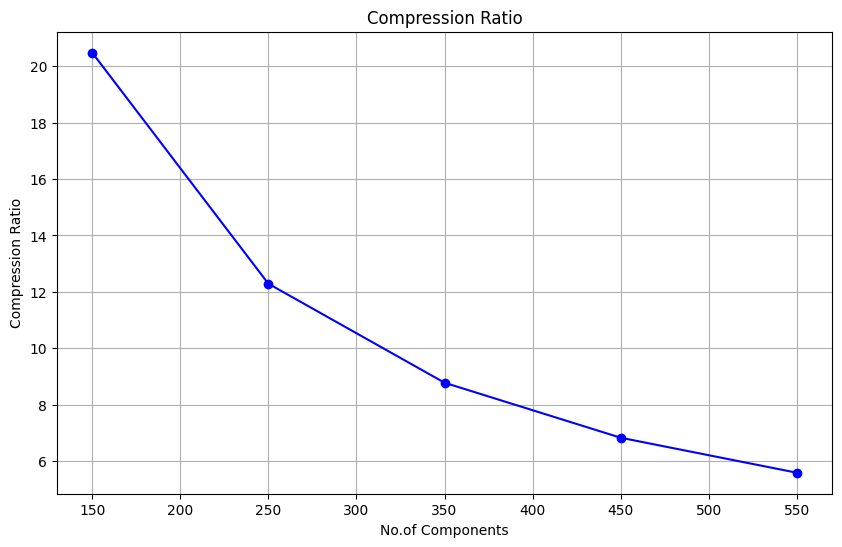

In [323]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(various_n_components,compression_ratios_list, marker='o', linestyle='-', color='b')
plt.title('Compression Ratio')
plt.ylabel('Compression Ratio')
plt.xlabel('No.of Components')
plt.grid(True)
plt.show()

Based on my understanding when I searched in google,"trade-off between compression ratio and image quality for varying numbers of components" is explained as original shape/no.of components, which is why we see as the no.of components increase, we see the decrease in compression ratio.

### 2.2.1

In [324]:
def plot_classes(org, new_data, labels, img_type = 'gray', nc = 10):
	_, ax = plt.subplots(nrows=nc, ncols=2, figsize=(5, 2*nc))
	for i in range(nc):
		class_i = np.where(labels == i)[0]
		img = np.random.choice(class_i)
		if img_type == 'gray':
			ax[i, 0].imshow(org[img].reshape(28,28) , cmap = 'gray')
			ax[i, 1].imshow(new_data[img].reshape(28,28) , cmap = 'gray')
		else:
			ax[i, 0].imshow(org[img].astype(np.uint8).reshape(3, 32, 32).transpose(1,2, 0))
			ax[i, 1].imshow(new_data[img].astype(np.uint8).reshape(3, 32, 32).transpose(1,2, 0))
		ax[i, 0].set_title(f'Original : Class {i}')
		ax[i, 0].axis('off')
		ax[i, 1].set_title(f'Reconstructed : Class {i}')
		ax[i, 1].axis('off')
	plt.tight_layout()
	plt.show()

In [325]:
n_components=250

In [326]:
print('MNIST Train Data Metrics:')
mnist_metrics_1 = calculate_metrics(mnist_train_flat_data,mnist_train_new,n_components)
for i,j in mnist_metrics_1.items():
	print(f'{i}\t:{j}')

MNIST Train Data Metrics:
MSE	:373.5932102683096
MAE	:10.540372212254011
PSNR	:22.406813861626436
Compression Ratio	:3.136


In [327]:
print('MNIST Test Data Metrics')
mnist_metrics_2 = calculate_metrics(mnist_test_flat_data,mnist_test_new,n_components)
for i,j in mnist_metrics_2.items():
	print(f'{i}\t:{j}')

MNIST Test Data Metrics
MSE	:365.3869103683652
MAE	:10.441099100350119
PSNR	:22.503273757512638
Compression Ratio	:3.136


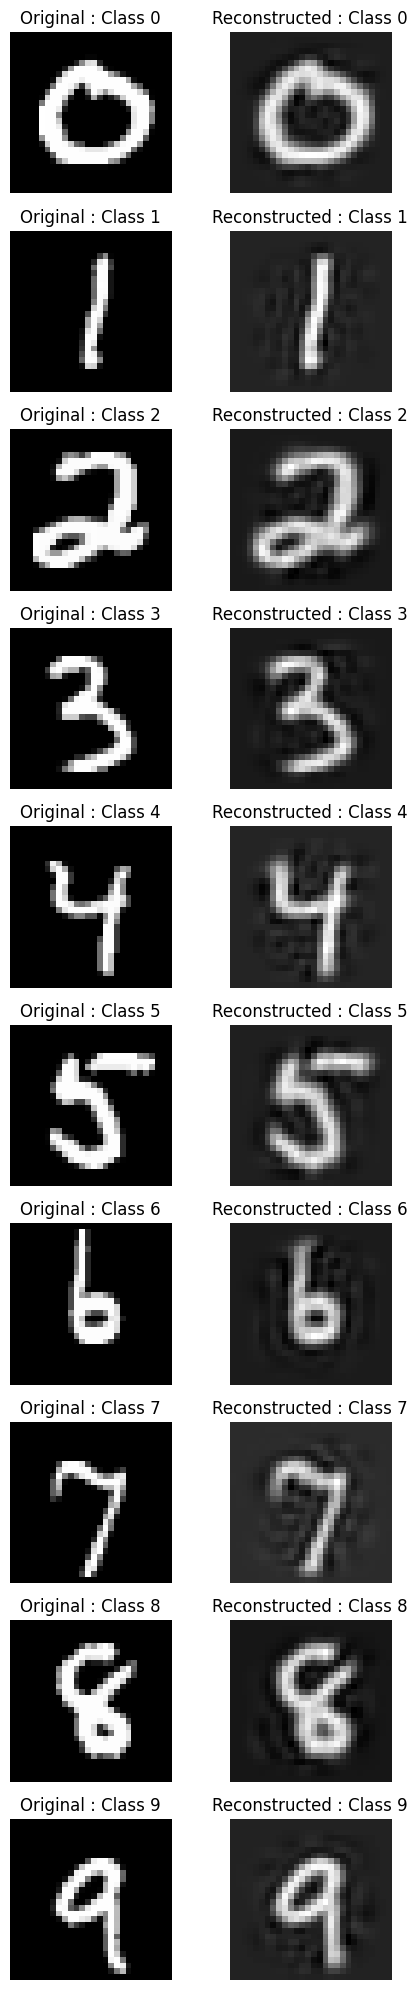

In [328]:
plot_classes(mnist_test_flat_data, mnist_test_new, mnist_test_output, 'gray', 10)


In [329]:
print('CIFAR Train Data Metrics')
metrics_3 = calculate_metrics(cifar_data_tr,cifar_train_new,n_components)
for i,j in metrics_3.items():
	print(f'{i}\t:{j}')

CIFAR Train Data Metrics
MSE	:22.452661341145834
MAE	:52.186516171875
PSNR	:34.61812535026481
Compression Ratio	:12.288


In [330]:
print('CIFAR Test Data Metrics')
metrics_4 = calculate_metrics(cifar_data_tt,cifar_test_new,n_components)
for i,j in metrics_4.items():
	print(f'{i}\t:{j}')

CIFAR Test Data Metrics
MSE	:22.927257845052083
MAE	:52.64755992838542
PSNR	:34.52728245692135
Compression Ratio	:12.288


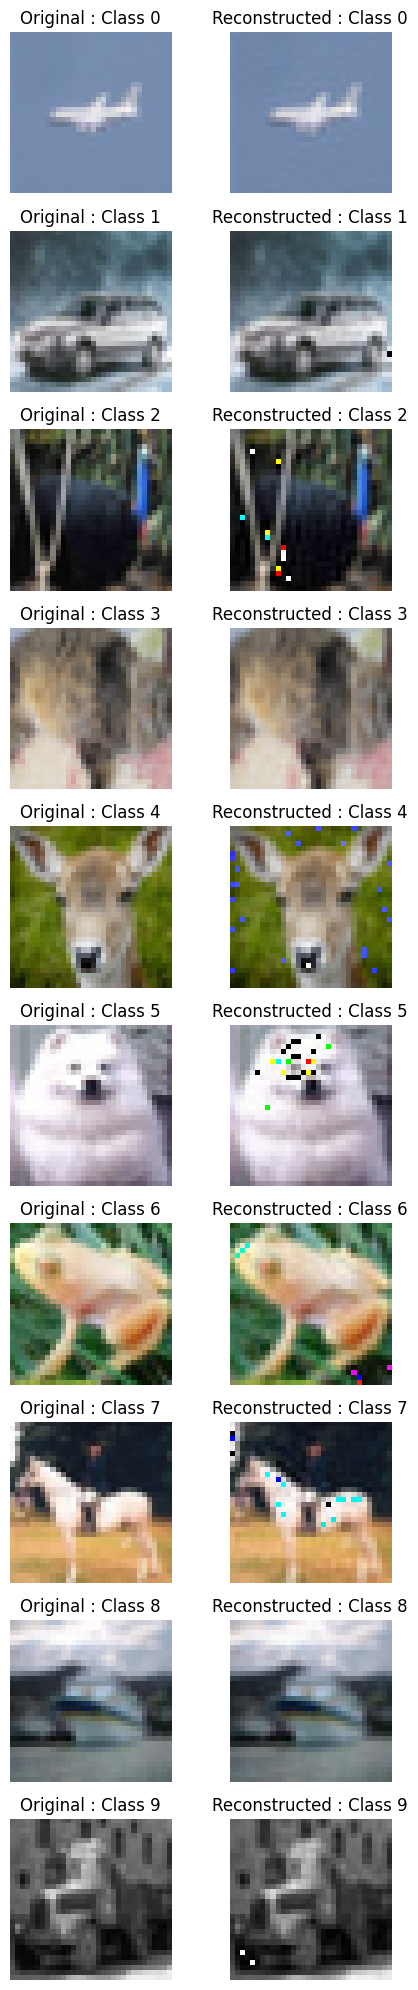

In [331]:
plot_classes(cifar_data_tt,cifar_test_new , cifar_tt_op, img_type='color')

### 2.2.2.b

#### As we have seen above the results are as:
CIFAR Test Data Metrics
MSE	:22.927257845052083
MAE	:52.64755992838542
PSNR	:34.52728245692135
Compression Ratio	:12.288

CIFAR Train Data Metrics
MSE	:22.452661341145834
MAE	:52.186516171875
PSNR	:34.61812535026481
Compression Ratio	:12.288

MNIST Test Data Metrics
MSE	:365.3869103683652
MAE	:10.441099100350119
PSNR	:22.503273757512638
Compression Ratio	:3.136

MNIST Train Data Metrics:
MSE	:373.5932102683096
MAE	:10.540372212254011
PSNR	:22.406813861626436
Compression Ratio	:3.136

My Observation on this data goes as:
- The MSE values for MNIST are significantly higher than for CIFAR-10. This might say that, on average, the pixel-wise reconstruction error for MNIST images is considerably larger.
- CIFAR-10 which is known for having more color images or we can say complex data, it reflects lower reconstruction error. 
- This could imply that the compression method preserves CIFAR-10 data characteristics better compared to MNIST.
- My understanding on PSNR that, it is a measure of the reconstruction quality, where higher values indicate better quality.
- So, PSNR of around 34 dB for CIFAR-10 indicates that the reconstructed images retain most of the perceptual quality of the originals, than when compared to MNIST data, which could be because the data is sensitive as it is of just grayscale features.
- For CIFAR-10, even with a high compression ratio, the PSNR remains high, which can indicate that the color data can be efficiently compressed with minimal quality loss.
- But we see, MNIST suffers huge loss in quality at a much lower compression ratio, which shows us that grayscale images are more sensitive to compression.


# 3 Stationary distribution of a Markov Chain

In [332]:
markov_file = data +f"transition_matrices/P_{index_no}.txt"
mkc = np.loadtxt(markov_file, delimiter=' ')
mkc.shape

(100, 100)

In [333]:
import time

## 3.1 Solving pi

In [334]:
def stationary_distribution_solve_system(P):
	n,m = P.shape
	A = P.T - np.eye(n)
	b = np.zeros(n)
	
	A = np.vstack([A, np.ones(n)])
	b = np.hstack([b, np.ones(1)])
	
	pi = np.linalg.lstsq(A, b, rcond=None)[0]
	print("π = ", pi)
	return pi
start_time = time.time()
mk_Pi = stationary_distribution_solve_system(mkc)
end_time = time.time()
time_sd = end_time - start_time
#mk_Pi.shape

π =  [0.0104945  0.01042537 0.00996446 0.00947347 0.00975286 0.01065838
 0.00946227 0.0095314  0.00952761 0.00933923 0.00989719 0.00947918
 0.0097626  0.01085327 0.01029216 0.01019405 0.00942932 0.00975882
 0.00927715 0.01041036 0.00950978 0.00987771 0.01089875 0.01065542
 0.01026941 0.0104448  0.00934362 0.00907741 0.009703   0.00917729
 0.00931739 0.01100211 0.00954851 0.01023837 0.00987298 0.00995681
 0.01096752 0.01074431 0.01006295 0.01073738 0.00914363 0.01106021
 0.00944484 0.00990016 0.01009228 0.01011398 0.01084419 0.00998468
 0.01039604 0.00955618 0.01024954 0.01042714 0.0097119  0.01014142
 0.00944253 0.01038715 0.01005972 0.01044573 0.00943014 0.00960791
 0.00981237 0.00998516 0.01072444 0.0100756  0.00923658 0.01019782
 0.01001892 0.010997   0.00966712 0.01074406 0.0106565  0.00983145
 0.00955569 0.01002737 0.00992582 0.00942025 0.01030788 0.01028182
 0.0093805  0.0104378  0.00996717 0.00940258 0.01041349 0.00959535
 0.0103918  0.00977193 0.00937983 0.00986819 0.01000706 0

In [335]:
np.sum(mk_Pi)

1.0000000000000004

we know that the sum of pi components should be 1. 

## 3.2 Using Power method

In [336]:
def stationary_distribution_power_method(P, tol=1e-10, max_iter=1000):
	n,m = P.shape
	pi = np.ones(n) / n  
	
	for i in range(max_iter):
		pi_next = np.dot(pi, P)
		if np.linalg.norm(pi_next - pi, ord=1) < tol:
			return pi_next, i + 1
		pi = pi_next
	print("π = ", pi)
	return pi_next, i + 1

start_time_Pw = time.time()
mk_pi_Pw, mk_pw_iter = stationary_distribution_power_method(mkc)
end_time_Pw = time.time()
time_Pw = end_time_Pw - start_time_Pw
print(f'power method iters : {mk_pw_iter}')
mk_pi_Pw.shape

power method iters : 9


(100,)

In [337]:
mk_pi_Pw

array([0.0104945 , 0.01042537, 0.00996446, 0.00947347, 0.00975286,
       0.01065838, 0.00946227, 0.0095314 , 0.00952761, 0.00933923,
       0.00989719, 0.00947918, 0.0097626 , 0.01085327, 0.01029216,
       0.01019405, 0.00942932, 0.00975882, 0.00927715, 0.01041036,
       0.00950978, 0.00987771, 0.01089875, 0.01065542, 0.01026941,
       0.0104448 , 0.00934362, 0.00907741, 0.009703  , 0.00917729,
       0.00931739, 0.01100211, 0.00954851, 0.01023837, 0.00987298,
       0.00995681, 0.01096752, 0.01074431, 0.01006295, 0.01073738,
       0.00914363, 0.01106021, 0.00944484, 0.00990016, 0.01009228,
       0.01011398, 0.01084419, 0.00998468, 0.01039604, 0.00955618,
       0.01024954, 0.01042714, 0.0097119 , 0.01014142, 0.00944253,
       0.01038715, 0.01005972, 0.01044573, 0.00943014, 0.00960791,
       0.00981237, 0.00998516, 0.01072444, 0.0100756 , 0.00923658,
       0.01019782, 0.01001892, 0.010997  , 0.00966712, 0.01074406,
       0.0106565 , 0.00983145, 0.00955569, 0.01002737, 0.00992

In [338]:
np.sum(mk_pi_Pw)

1.0000000008900647

## 3.3 Compare and Analysis

### 3.3.a pi using two methods

In [339]:
print("Using System SOlve method:")
print(mk_Pi)

Using System SOlve method:
[0.0104945  0.01042537 0.00996446 0.00947347 0.00975286 0.01065838
 0.00946227 0.0095314  0.00952761 0.00933923 0.00989719 0.00947918
 0.0097626  0.01085327 0.01029216 0.01019405 0.00942932 0.00975882
 0.00927715 0.01041036 0.00950978 0.00987771 0.01089875 0.01065542
 0.01026941 0.0104448  0.00934362 0.00907741 0.009703   0.00917729
 0.00931739 0.01100211 0.00954851 0.01023837 0.00987298 0.00995681
 0.01096752 0.01074431 0.01006295 0.01073738 0.00914363 0.01106021
 0.00944484 0.00990016 0.01009228 0.01011398 0.01084419 0.00998468
 0.01039604 0.00955618 0.01024954 0.01042714 0.0097119  0.01014142
 0.00944253 0.01038715 0.01005972 0.01044573 0.00943014 0.00960791
 0.00981237 0.00998516 0.01072444 0.0100756  0.00923658 0.01019782
 0.01001892 0.010997   0.00966712 0.01074406 0.0106565  0.00983145
 0.00955569 0.01002737 0.00992582 0.00942025 0.01030788 0.01028182
 0.0093805  0.0104378  0.00996717 0.00940258 0.01041349 0.00959535
 0.0103918  0.00977193 0.00937983 0

In [340]:
print("Using Power Method:")
print(mk_pi_Pw)

Using Power Method:
[0.0104945  0.01042537 0.00996446 0.00947347 0.00975286 0.01065838
 0.00946227 0.0095314  0.00952761 0.00933923 0.00989719 0.00947918
 0.0097626  0.01085327 0.01029216 0.01019405 0.00942932 0.00975882
 0.00927715 0.01041036 0.00950978 0.00987771 0.01089875 0.01065542
 0.01026941 0.0104448  0.00934362 0.00907741 0.009703   0.00917729
 0.00931739 0.01100211 0.00954851 0.01023837 0.00987298 0.00995681
 0.01096752 0.01074431 0.01006295 0.01073738 0.00914363 0.01106021
 0.00944484 0.00990016 0.01009228 0.01011398 0.01084419 0.00998468
 0.01039604 0.00955618 0.01024954 0.01042714 0.0097119  0.01014142
 0.00944253 0.01038715 0.01005972 0.01044573 0.00943014 0.00960791
 0.00981237 0.00998516 0.01072444 0.0100756  0.00923658 0.01019782
 0.01001892 0.010997   0.00966712 0.01074406 0.0106565  0.00983145
 0.00955569 0.01002737 0.00992582 0.00942025 0.01030788 0.01028182
 0.0093805  0.0104378  0.00996717 0.00940258 0.01041349 0.00959535
 0.0103918  0.00977193 0.00937983 0.009868

### 3.3.b

In [341]:
np.linalg.norm(mk_Pi - mk_pi_Pw)

8.909457189097607e-11

In [342]:
error_SS = np.linalg.norm(np.dot(mk_Pi, mkc) - mk_Pi, ord=1)
sum_SS = np.sum(mk_Pi)

error_PR = np.linalg.norm(np.dot(mk_pi_Pw, mkc) - mk_pi_Pw, ord=1)
sum_PR = np.sum(mk_pi_Pw)

print("System Solve Method")
# print(f"Stationary Distribution: {markov_SS_Pi}")
print(f"Verification ||πTP - πT||1 = {error_SS}")
print(f"Sum of π elements: {sum_SS}")
print(f"Execution Time: {time_sd} seconds")


System Solve Method
Verification ||πTP - πT||1 = 9.636969174053878e-11
Sum of π elements: 1.0000000000000004
Execution Time: 0.028021812438964844 seconds


In [343]:
print("\nPower Method")
print(f"Verification ||πTP - πT||1 = {error_PR}")
print(f"Sum of π elements: {sum_PR}")
print(f"Number of Iterations: {mk_pw_iter}")
print(f"Execution Time: {time_Pw} seconds")



Power Method
Verification ||πTP - πT||1 = 9.636969174053878e-11
Sum of π elements: 1.0000000008900647
Number of Iterations: 9
Execution Time: 0.002522706985473633 seconds


Using System solve Method:
1. ||πTP - πT|| is close to zero
2. Sum of π elements is very close to 1
3. We need only one iteration since we just solve the system of equations.
4. We need 0.09387516975402832 seconds to execute this method

Using Power Method:
1. ||πTP - πT|| is close to zero
2. Sum of π elements is very close to 1
3. We need 9 iterations for convergence.
4. We need 0.026713132858276367 seconds to execute this method, which is a bit faster than the System Solve method

### 3.4 Analysis

In [344]:
print("\nAnalysis and comparision:")
print(f"System Solve Method execution time: {time_sd} seconds")
print(f"Power Method execution time: {time_Pw} seconds")
print(f"Power Method iterations to converge: {mk_pw_iter}")

print("\nAccuracy Comparison:")
print(f"System Solve Method error ||πTP - πT||1: {error_SS}")
print(f"Power Rule Method error ||πTP - πT||1: {error_PR}")

print("\nSum of stationary distributions:")
print(f"System Solve Method: {sum_SS}")
print(f"Power Rule Method: {sum_PR}")


Analysis and comparision:
System Solve Method execution time: 0.028021812438964844 seconds
Power Method execution time: 0.002522706985473633 seconds
Power Method iterations to converge: 9

Accuracy Comparison:
System Solve Method error ||πTP - πT||1: 9.636969174053878e-11
Power Rule Method error ||πTP - πT||1: 9.636969174053878e-11

Sum of stationary distributions:
System Solve Method: 1.0000000000000004
Power Rule Method: 1.0000000008900647


Using System solve Method:
1. Accuracy:
- Here, the accuracy depends on linear system of equations, as the  method gives a very accurate solution only if the linear system is well-conditioned.
2. Computational efficiency:
- Here, using np.linalg.lstsq() it has complexity of O(n^3) operations. hence, cant be suggested for large matrices.
3. Impact of Matrix size:
- As discussed in 2nd point, this method is suitable for small matrices since, solving the system directly is feasible and efficient. and for large matrices, solving the system becomes impractical (as it takes cubic time complexity) and the memory issues arises with storing and when manipulating large matrices.

Using Power Method:
1. Accuracy:
- Here, the accuracy of depends on the tolerance (tol) and number of iterations (max_iter). So, for higher accuracy, we can give more iterations, and the tolerance scan be set very low. 
- Hence, Convergence can take a longer time, especially if the spectral gap (difference between the largest and the second-largest eigenvalues) is small.
2. Computational efficiency:
- Here, the complexity per iteration is O(n^2) for an n x n matrix as it involves repeated matrix-vector multiplication.
- Hence, the total complexity is O(k * n^2) (where k is the number of iterations).
- And also, this method is linear(in the no.of iterations), which can make it efficient if the matrix is sparse or when the number of iterations required to converge is low.
- Therefore, not suggested for small matrices.
3. Impact of Matrix size:
-As discussed in 2nd point, this method is suitable for large and sparse transition matrices.


# 4 Spectral Norm of a Matrix

## 4.1 Initialize

In [345]:
G = np.loadtxt(data+f"spectral_norm_matrices/matrix_{index_no}.txt")
G.shape , G.dtype 

((400, 500), dtype('float64'))

## 4.2 power iteration algo

In [346]:
gram_list=[]
power_list=[]

In [347]:
power_list=[]
def Power_iteration(G,N_iter):
    temp_list=[]
    u = np.random.rand(G.shape[1])
    for _ in range(N_iter):
        temp = np.dot(G, u) 
        v = temp / np.linalg.norm(temp)
        t2 = np.dot(G.T, v) 
        u = t2 / np.linalg.norm(t2)
        temp_list.append(np.dot(np.dot(G, u), v))
        power_list.append(np.dot(np.dot(G, u), v))
    return np.dot(np.dot(G, u), v),temp_list

In [348]:
print(Power_iteration(G, 2000)[0])

41.65164051183103


In [349]:
print(len(Power_iteration(G, 2000)[1]))

2000


As required, after 2000 iterations, the spectral norm is: 0.09319199556783805

## 4.3 Gram iteration Algo

In [350]:
gram_list=[]
def Gram_iteration(G,N_iter):
    temp_list=[]
    r = 0
    m, n = G.shape
    if n > m:
        G = G.T
    for hh in range(N_iter):
        G_norm_F = np.linalg.norm(G, 'fro')
        r = 2 *( r + np.log(G_norm_F))
        G /= G_norm_F
        G = G.T @ G
        t=2**(-hh)
        t2= np.linalg.norm(G, 'fro')
        temp_list.append((t2**t ) * (np.exp(t* r)))
        gram_list.append((t2**t ) * (np.exp(t* r)))
    temp = 2**( -N_iter)
    G_norm_F = np.linalg.norm(G, 'fro')
    return (G_norm_F**temp ) * (np.exp(temp* r)), temp_list,G


In [351]:
print(Gram_iteration(G, 15)[0])

41.65164051183104


In [352]:
gram_list_step1=gram_list

As required, after 15 iterations, the spectral norm is: 0.09319199556783814

## 4.4 Analysis and compare

In [353]:
repeats_count = 100
power_N_iter = 2000
gram_N_iter = 15

norm_pow = []
norm_gram = []
time_track_pow = []
time_track_gram = []
norm_track_pow=[]
norm_track_gram=[]
mean_track_pow = []
mean_track_gram = []
std_track_pow = []
std_track_gram = []
gram_list=[]
power_list=[]
track_pow=dict()
track_gram=dict()

for _ in range(repeats_count):
    st = time.time()
    op = Power_iteration(G, power_N_iter)
    time_track_pow.append(time.time() - st)
    mean_track_pow.append(np.mean(op[1]))
    track_pow[_]=np.array(op[1])
    std_track_pow.append(np.std(op[1]))
    norm_pow.append(op[0])
    G_copy=G.copy()
    st = time.time()
    op = Gram_iteration(G_copy, gram_N_iter)
    time_track_gram.append(time.time() - st)
    track_gram[_]=np.array(op[1])
    mean_track_gram.append(np.mean(op[1]))
    std_track_gram.append(np.std(op[1]))
    G_copy=op[2] #updating G for each iteration
    norm_gram.append(op[0])


## 4.5 Average Run Times

In [354]:
print("Using Power_Iterations(after 100 repeats):",np.mean(norm_pow))
print("Using Gram_iter(after 100 repeats):", np.mean(norm_gram))

Using Power_Iterations(after 100 repeats): 0.09319199556783811
Using Gram_iter(after 100 repeats): 0.09319199556783818


In [355]:
x1=np.mean(time_track_gram)
x2=np.mean(time_track_pow)
print(f"Average Run Time using Power_Iterations: {np.mean(time_track_pow):.3f} seconds")
print(f"Average Run Time using Gram_iter: {np.mean(time_track_gram):.3f} seconds")
print(f"Difference in Run Time: {x2 - x1:.3f} seconds")


Average Run Time using Power_Iterations: 1.016 seconds
Average Run Time using Gram_iter: 0.029 seconds
Difference in Run Time: 0.988 seconds


## 4.6 reference sigma from svd 

In [356]:
u, s, vh = np.linalg.svd(G, full_matrices=False)
sigma_svd = s[0]  # Largest singular value is the spectral norm
print(f"Spectral Norm using SVD: {sigma_svd}")


Spectral Norm using SVD: 0.0931919955678381


In [357]:
print("Difference in Spectral Norms:")
print("SVD - Power_Iterations:", sigma_svd - np.mean(norm_pow))
print("SVD - Gram_iter:", sigma_svd - np.mean(norm_gram))

Difference in Spectral Norms:
SVD - Power_Iterations: -1.3877787807814457e-17
SVD - Gram_iter: -8.326672684688674e-17


We notice a very less difference with SVD for each methiod

## 4.7 Plots

In [358]:
diff_p = np.abs(np.array(norm_pow) - sigma_svd)
diff_g = np.abs(np.array(norm_gram) - sigma_svd)

In [359]:
len(diff_p),len( diff_g)

(100, 100)

In [360]:
len(mean_track_gram),len(mean_track_pow),len(std_track_pow),len(std_track_gram)

(100, 100, 100, 100)

In [361]:
diff_p2 = np.abs(np.array(power_list[:2000]) - sigma_svd) #for first iteration or step
diff_g2 = np.abs(np.array(gram_list_step1) - sigma_svd) #for first iteration or step

In [362]:
len(diff_p2)

2000

In [363]:
len(diff_g2)

15

In [364]:
d_mean=np.mean(power_list[:2000])
d_std=np.std(power_list[:2000])
g_mean=np.mean(gram_list[:15])
g_std=np.std(gram_list[:15])

In [365]:
np.log(np.abs(np.log(np.abs(d_mean)))),np.log(np.abs(np.log(np.abs(d_std))))

(0.8645757133774632, 1.9661355441137145)

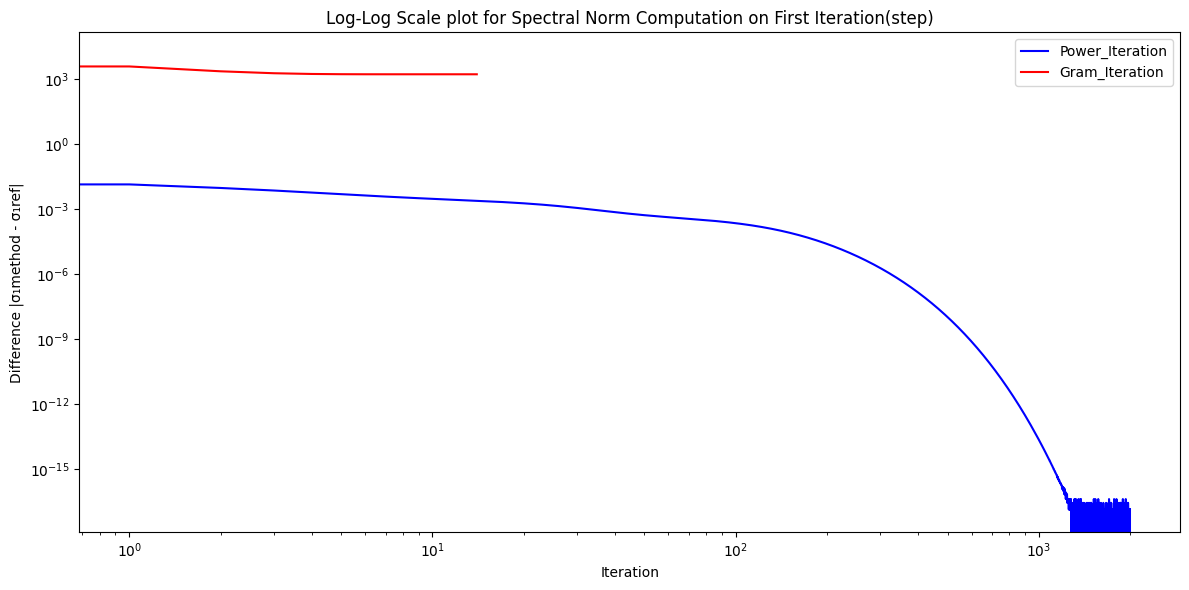

In [366]:
plt.figure(figsize=(12, 6))
plt.loglog(diff_p2, label="Power_Iteration", color="blue")
plt.loglog(diff_g2, label="Gram_Iteration", color="red")
plt.xlabel("Iteration")
plt.ylabel("Difference |σ₁method - σ₁ref|")
plt.title("Log-Log Scale plot for Spectral Norm Computation on First Iteration(step)")
plt.legend()
plt.tight_layout()
plt.show()


This graph is for the first step(out of 100) and showing that it converges in Power_iteration, but in Gram_iterations, we take only 15 iterations whose distamce to referred_SVD is very low and hence, it seems to be in straight line.

In [367]:
len(track_pow[0]), len(track_gram[0])

(2000, 15)

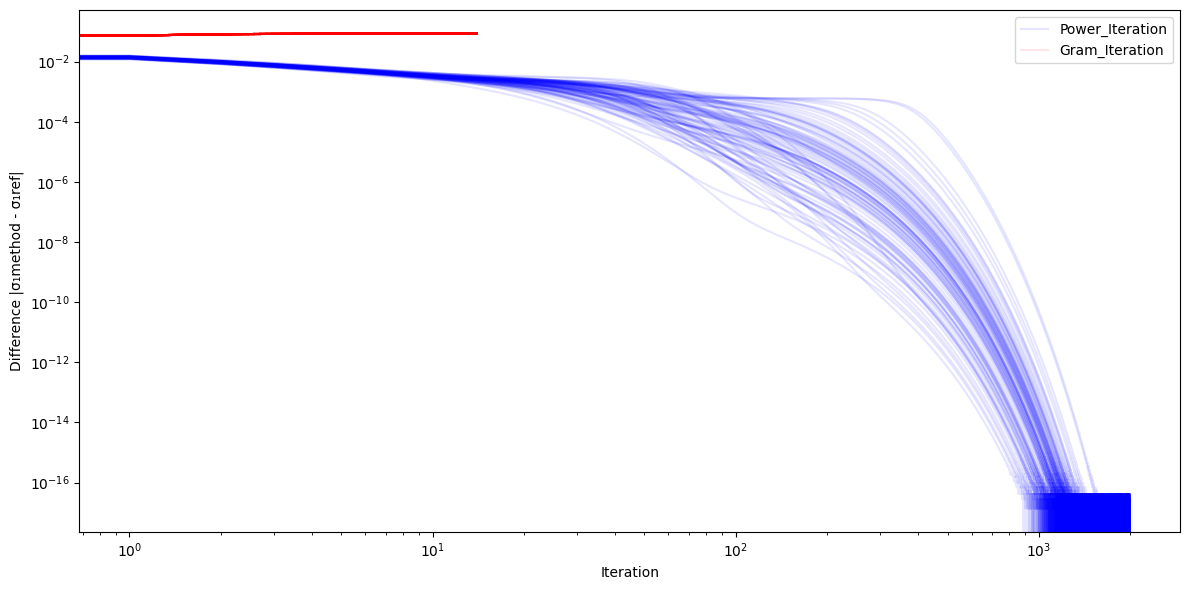

In [368]:
plt.figure(figsize=(12, 6))
for i in range(0,repeats_count):
    diff_p3 = np.abs(np.array(track_pow[i]) - sigma_svd)
    diff_g3 = np.abs(np.array(track_gram[i]) - sigma_svd) 
    plt.loglog(diff_p3, color='blue', alpha=0.1)
    plt.loglog(diff_g3, color='red', alpha=0.1)
    plt.xlabel("Iteration")
    plt.ylabel("Difference |σ₁method - σ₁ref|")
    plt.legend(["Power_Iteration", "Gram_Iteration"])
plt.tight_layout()
plt.show()


This plot shows how the algorithms converge in all 100 steps

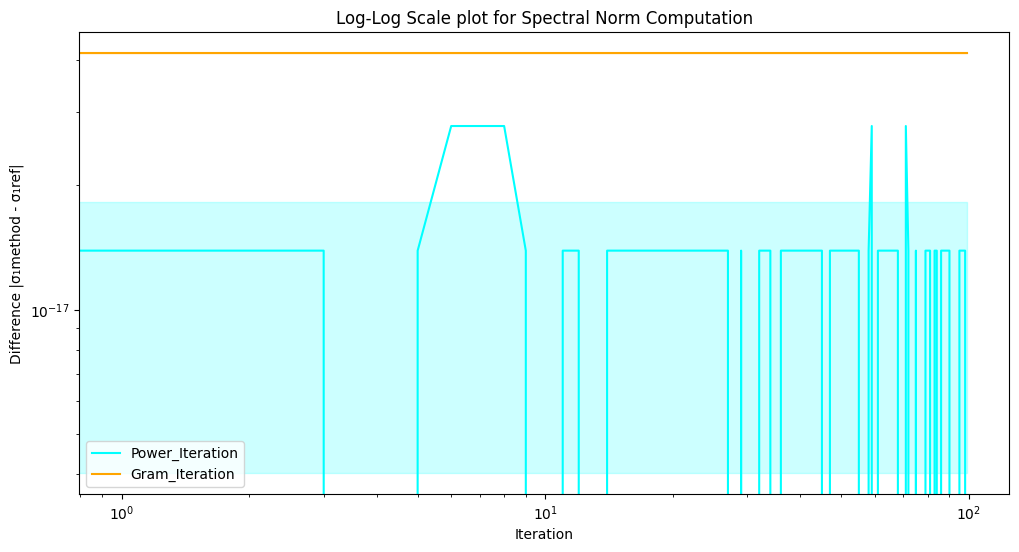

In [369]:
plt.figure(figsize=(12, 6))
plt.loglog(diff_p, label="Power_Iteration", color="cyan")
plt.fill_between(range(repeats_count),np.mean(diff_p) - np.std(diff_p),np.mean(diff_p) + np.std(diff_p),color="cyan", alpha=0.2)
plt.loglog(diff_g, label="Gram_Iteration", color="orange")
plt.fill_between(range(repeats_count),np.mean(diff_g) - np.std(diff_g),np.mean(diff_g) + np.std(diff_g),color="orange", alpha=0.2)
plt.xlabel("Iteration")
plt.ylabel("Difference |σ₁method - σ₁ref|")
plt.title("Log-Log Scale plot for Spectral Norm Computation")
plt.legend()
plt.show()


This plot is with the difference of the singular values of the output in each step(total:100) and svd_output

## 4.8

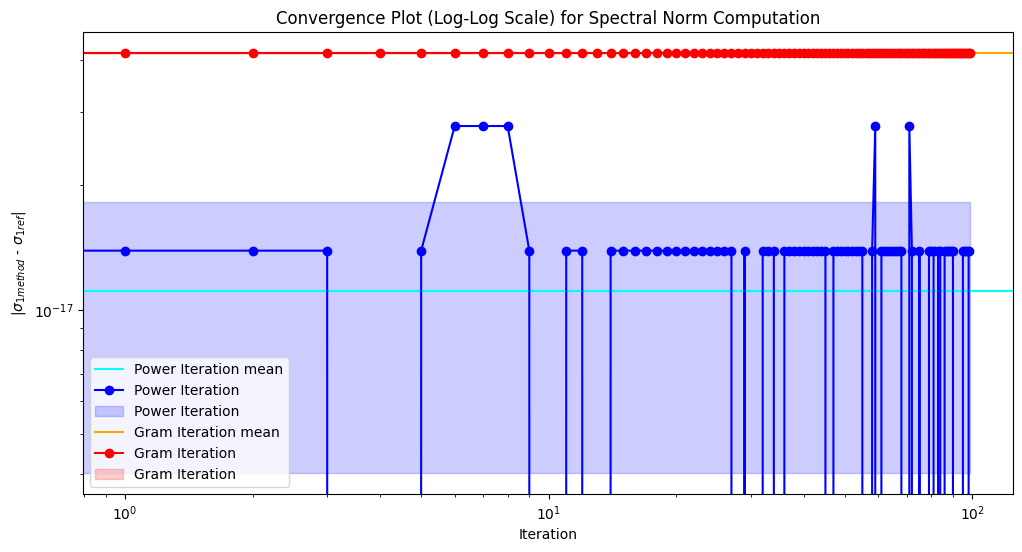

In [370]:
plt.figure(figsize=(12, 6))
plt.axhline(np.mean(diff_p), label="Power Iteration mean", color="cyan")
plt.loglog(diff_p, label="Power Iteration",  marker = 'o',color="blue")
plt.fill_between(range(repeats_count),np.mean(diff_p) - np.std(diff_p),np.mean(diff_p) + np.std(diff_p),color="blue", alpha=0.2,label="Power Iteration")

plt.axhline(np.mean(diff_g) ,label="Gram Iteration mean", color="orange")
plt.loglog(diff_g, label="Gram Iteration",  marker = 'o',color="red")
plt.fill_between(range(repeats_count),np.mean(diff_g) - np.std(diff_g),np.mean(diff_g) + np.std(diff_g),color="red", alpha=0.2,label="Gram Iteration")

plt.xlabel("Iteration")
plt.ylabel("|$\\sigma_{1method}$ - $\\sigma_{1ref}$|")
plt.title("Convergence Plot (Log-Log Scale) for Spectral Norm Computation")
plt.legend()
plt.show()


## 4.9 Insights from both Algorithms 

As we have seen that:
- Average Run Time using Power_Iterations: 1.033 seconds
- Average Run Time using Gram_iter: 0.036 seconds
- SVD - Power_Iterations: -1.3877787807814457e-17
- SVD - Gram_iter: -8.326672684688674e-17
##### lets compare these both algorithms:
- We can see that Gram_Iterations has took less time when compared to Power_Iterations as it takes less iterations to converge to required tolerance, hence, we can say that we prefer to use "Gram_Iterations" when we need "fast computations"
- We can see that even though both the algorithms converged very near to referred SVD value, but Power Iterations is much more closer, hence, we can say that we prefer to use "Power_Iterations" when we need "exact approximation", but it takes a lot iterations when compared to gram_Iterations.

## 4.10 Finding min and max eigen values using the power iteration method

In [371]:
def eigs_min_max_power(A, N_iter = 10000):
    max_eval  = Power_iteration(A,N_iter)[0]
    #print(max_eval)
    shifted_A = A - max_eval * np.eye(A.shape[0])
    max_eval_2 = Power_iteration(shifted_A,N_iter)[0]
    min_eval = max_eval - max_eval_2
    return min_eval, max_eval

In [372]:
symm_mat_1= np.array([
    [1, 3, 2, 4],
    [3, 5, 1, 0],
    [2, 1, 6, 5],
    [4, 0, 5, 7]
])
symm_mat_2=np.diag([1,4,5,2,8,9,1,1])
symm_mat_3=np.array([
    [2, 1],
    [1, 3]
])

In [373]:
op_1= eigs_min_max_power(symm_mat_1, 10000)
actual_1= np.linalg.eigvals(symm_mat_1)
print(f"Expected Min and Max Eigenvalues: {min(actual_1)} , {max(actual_1)}")
print(f"Computed Min and Max Eigenvalues: {op_1[0]} , {op_1[1]}")
print(f"Error in Min Eigenvalue: {np.abs(op_1[0] - min(actual_1))}")
print(f"Error in Max Eigenvalue: {np.abs(op_1[1] - max(actual_1))}")

Expected Min and Max Eigenvalues: -2.0997824793215014 , 13.41028537592773
Computed Min and Max Eigenvalues: -2.099782479321501 , 13.410285375927739
Error in Min Eigenvalue: 4.440892098500626e-16
Error in Max Eigenvalue: 8.881784197001252e-15


In [374]:
op_2= eigs_min_max_power(symm_mat_2, 10000)
actual_2= np.linalg.eigvals(symm_mat_2)
print(f"Expected Min and Max Eigenvalues: {min(actual_2)} , {max(actual_2)}")
print(f"Computed Min and Max Eigenvalues: {op_2[0]} , {op_2[1]}")
print(f"Error in Min Eigenvalue: {np.abs(op_2[0] - min(actual_2))}")
print(f"Error in Max Eigenvalue: {np.abs(op_2[1] - max(actual_2))}")

Expected Min and Max Eigenvalues: 1.0 , 9.0
Computed Min and Max Eigenvalues: 0.9999999999999982 , 9.0
Error in Min Eigenvalue: 1.7763568394002505e-15
Error in Max Eigenvalue: 0.0


In [375]:
op_3= eigs_min_max_power(symm_mat_3, 10000)
actual_3= np.linalg.eigvals(symm_mat_3)
print(f"Expected Min and Max Eigenvalues: {min(actual_3)} , {max(actual_3)}")   
print(f"Computed Min and Max Eigenvalues: {op_3[0]} , {op_3[1]}")
print(f"Error in Min Eigenvalue: {np.abs(op_3[0] - min(actual_3))}")
print(f"Error in Max Eigenvalue: {np.abs(op_3[1] - max(actual_3))}")

Expected Min and Max Eigenvalues: 1.381966011250105 , 3.618033988749895
Computed Min and Max Eigenvalues: 1.381966011250105 , 3.6180339887498953
Error in Min Eigenvalue: 0.0
Error in Max Eigenvalue: 4.440892098500626e-16


To find the maximum eigenvalue, we can directly use Power Iteration, on the original matrix G as it is designed to find the largest magnitude eigenvalue of a matrix, so no modification is needed.